<a href="https://colab.research.google.com/github/divijghose/COVID_Wave3_IISc/blob/main/COVID_Wave3_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This is a "jupyter paper" that shows a possibility to write/submit/publish scientific papers as jupyter notebooks. The paper is interactive meaning that you can run the code yourself to reproduce all the results. The code is intermixed with the usual paper's text and figures (the code sections should appear hidden by default).*
# Ensemble forecast of COVID-19 in Karnataka for vulnerability  assessment and policy interventions

Sashikumaar Ganesan$^1$, Deepak Subramani$^1$,Thivin Anandh$^1$, Divij Ghose$^1$, Giridhara R Babu$^2$

$^1$Department of Computational and Data Sciences,
              Indian Institute of Science,
              Bangalore, India

$^2$Life-course Epidemiology, Indian Institute of Public Health-Bangalore, Public Health Foundation of India, Bangalore, India

# Import data files/install python modules (Code)

In [ ]:
############################################ Import Python Libraries Required ############################################ 
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors

import datetime
import os 
from os import path
import seaborn as sns
from scipy import signal

import warnings
warnings.filterwarnings('ignore')

import pickle

import statistics

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
%config InlineBackend.figure_format = 'retina'

os.makedirs("Output_Files/Images")

In [ ]:
############################################ Import data files from github repo ############################################ 
%%shell
git clone https://github.com/divijghose/COVID_Wave3_IISc

Cloning into 'COVID_Wave3_IISc'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 30 (delta 4), reused 27 (delta 4), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [ ]:
############################################ Initialize Parameters and Dataframes ############################################

NOWAVEPEAKDATE =  670
NOWAVEPEAKNUMBER = 2

## 1,Case to Infection Ratio -- KDP_nu -- -
KDP_nu_name=["CIR40" ,"CIR50"]
KDP_nu=[1,1.25]

## 2, Percentage transmission of immune-escape new variant --  KDP_w_sat_1  -- -
KDP_w_sat_1_name=["0_33" ,"0_66" ,"1_00"]
KDP_w_sat_1=[0.33, 0.66 ,1.00]

## 3, Emergence date of immune-escape new variant --  KDP_w_sat_2  -- -
KDP_w_sat_2_name=["ImmunEscp_Jul" ,"ImmunEscp_Sep", "ImmunEscp_Nov"]
KDP_w_sat_2=[380, 442 ,503]

## 4,Antibody waning population percentage  --  KDP_g_1  -- -
KDP_g_1_name=["0_33", "0_66" ,"1_00"]
KDP_g_1=[0.33, 0.66, 1.00]

## 5, Antibody waning period --  KDP_g_2  -- -
KDP_g_2_name=["ABW150Days" ,"ABW180Days"]
KDP_g_2=[150 ,180]

## 6, Vaccine Rate --  KDP_c_p  -- -
KDP_c_p_name=["Vaccine_PresentRate", "Vaccine_BestWeekAvg", "Vaccine_TwicePresent"]
KDP_c_p=[1 ,1.5, 2]

## 7, Social Distancing (COVID Appropriate Behaviour -> Good CAB = SD_RA, Partial CAB = SD_RAR, No CAB = SD_RARF ) --  KDP_c_p  -- -
KDP_lambda_name=["SD_RA","SD_RAR","SD_RARF"]
KDP_lambda=[0,0.1,0.2]

df_active = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_active")
df_nucleation_total = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_nucleation_total") # confirmed cases

df_nucleation_11 = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_nucleation_11")
df_nucleation_18 = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_nucleation_18")
df_nucleation_45 = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_nucleation_45")
df_nucleation_60 = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_nucleation_60")
df_nucleation_60plus = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_nucleation_60plus")

df_antibody = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_antibody")
df_Vaccinated = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_Vaccinated")
df_nucleation_18plus = pd.read_pickle("COVID_Wave3_IISc/Data_Files/df_nucleation_18plus")

with open('COVID_Wave3_IISc/Data_Files/actual.pkl', 'rb') as f: mynewlist = pickle.load(f) #actual number of active cases 



# Abstract (Text)

We present an ensemble forecast for Wave-3 of COVID-19 in the state of Karnataka, India, using the IISc  Population Balance Model for infectious disease spread. The reported data of confirmed, recovered, and deceased cases in Karnataka from 1 July 2020 to 4 July 2021 is utilized to tune the model's parameters, and an ensemble forecast is done from 5 July 2021 to 30 June 2022. The ensemble is built with 972 members by varying seven critical parameters that quantify the uncertainty in the spread dynamics (antibody waning, viral mutation) and interventions (pharmaceutical, non-pharmaceutical). The probability of Wave-3, the peak date distribution, and the peak caseload distribution are estimated from the ensemble forecast. Our analysis shows that the most significant causal factors are compliance to Covid-appropriate behavior, daily vaccination rate, and the immune escape new variant emergence-time. These causal factors determine when and how severe the Wave-3 of COVID-19 would be in Karnataka. We observe that when compliance to Covid-Appropriate Behavior is good (i.e., lockdown-like compliance), the emergence of new immune-escape variants beyond Sep '21 is unlikely to induce a new wave. A new wave is inevitable when compliance to Covid-Appropriate Behavior is only partial.
Increasing the daily vaccination rates reduces the peak active caseload at Wave-3. Consequently, the hospitalization, ICU, and Oxygen requirements also decrease. Compared to Wave-2, the ensemble forecast indicates that the number of daily confirmed cases of children (0-17 years) at Wave-3's peak could be seven times more on average. Our results provide insights to plan science-informed policy interventions and public health response.


#1 Introduction (Text)

COVID cases were reported in India from February 2020, and the first nationwide lockdown was imposed on 25 March 2020. A graded reopening started in June 2020. After that, in the state of Karnataka, the Wave-1 began gradually building up and reached a maximum daily confirmed caseload of 10K (7-day average) around 11 October 2020. Subsequently, the daily confirmed caseload was reduced to less than 1K by December 2020 and stayed below 1K until mid-March 2021. From the 3rd week of March 2021, the caseload started increasing again, and a Wave-2 started raging, reaching a peak of 47.5K daily confirmed cases on 9 May 2021$^{[1]}$.
Additionally, since 16 January 2021, vaccination against COVID-19 started in India with a rationing policy based on the recipient's age$^{[2]}$. Genome sequencing studies have shown that Wave-1 was caused by the B.1.1.7 ('Alpha') variant and Wave-2 was caused by the B.1.617.2 ('Delta') variant$^{[3-7]}$. Despite timely NPIs (decentralized state-wise, city-wise, and community-wise lockdown), there was a widespread concern due to the high load on the medical infrastructure with reports of ICU and oxygen shortages. 

Unfortunately, none of the mathematical models in use before Wave-2 could forecast the Wave-2 $^{[8]}$. Unaccounted uncertainties in human behaviour, mobility, local government policies, mutation, immune response, and anti-body waning could be one of the reasons for the forecast failure. For a successful forecast, an ensemble method that incorporates these uncertainties is needed. An ensemble forecast is built by aggregating predictions from different scenarios and models. Such an approach has been shown to perform well in different fields consistently, e.g.,$^{[9-12]}$. Particularly for COVID-19, a multimodel ensemble approach   aggregates short-term model forecasts from individual modellers/groups was used in the USA and publicly released by the Centers for Disease Control and Prevention  (CDC) every week$^{[13]}$. In Italy, there have been attempts to use ensemble forecasting for short-term projection of the ICU requirements $^{[14]}$. Even though a multi-model ensemble was used, careful uncertainty quantification of the parameters, as mentioned earlier,  was not included in these studies. 


Several authors have analyzed the data of COVID Wave-2 in India and ascribed causal factors$^{[15]}$. The importance of mutation in the Wave-2 and $^{[16]}$ the effect of immunity waning have been characterized $^{[17]}$. The effect of non-pharmaceutical interventions like lockdowns $^{[18-19]}$ and vaccine allocation strategies $^{[20]}$ has also been studied. Predictions for third-wave based on immunity waning, the emergence of an immune-escape new variant, and social distancing $^{[20]}$ have also been made. However, no comprehensive ensemble forecast considering all known causal factors has been reported in the literature. 

Our goal is to build a long-term ensemble forecasting system that includes all the causal factors with uncertainties. Such a system will enable policymakers to better prepare for all eventualities. Specifically, we aim to quantify the probability of a new COVID wave (Wave-3) in Karnataka, India, and determine the distribution of the date and age-wise caseload of Wave-3’s peak. Further, we aim to determine the factors contributing to a new wave and recommend suitable interventions to reduce its likelihood and impacts.

#2 Materials and Methods (Text)



##2.1 IISc-Covid Model
The IISc COVID model proposed in$^{[21]}$is employed to compute all estimates using our in-house finite element package$^{[22,23]}$. The model consists of an unknown scalar function describing the dynamics of the infected population in a six-dimensional space. In particular, the active infected population is distributed in space, infection severity, duration of the infection, and age of the infected people. Let $T_\infty$ be a given final time, $\Omega:=\Omega_x\otimes\Omega_\ell$ be the spatial domain, and $\Omega_\ell:=L_v\times L_d\times L_a$ be the internal domain. Here, $L_v$, $L_d$ and  $L_a$ denote  the infection severity,  duration of infection, age of the people, respectively. Then, the dynamics of the infected population $I(t,\boldsymbol{x},\boldsymbol{l}) \in(0,T_\infty]\times\Omega_x\otimes\Omega_\ell$ is described by the  population balance equation 
\begin{equation*} 
 \begin{array}{rcll}
\displaystyle\frac{\partial I}{\partial t} + \nabla\cdot(\textbf{u} I) +\nabla_\ell\cdot(\textbf{G} I) + CI  &=& F  \quad  &{\textrm  {in} }  \quad (0,T_\infty]\times\Omega_x\times\Omega_\ell \,,\\
 I(t,\boldsymbol{x},\boldsymbol{l}) &=&g_n    &{\textrm {in} }  \quad (0,T_\infty]\times\partial\Omega^{-}_{ x}\times  \Omega_\ell\,,\\
 I(t,\boldsymbol{x},(\ell_v,0,\ell_a))  & =& B_{\textrm nuc} \quad  &{\textrm {in} }  \quad (0,T_\infty]\times\Omega_{x}\times L_v\times L_a \,,\\
 I(t,\boldsymbol{x},(0,\ell_d>0,\ell_a))  & =& 0 \quad  &{\textrm {in} }  \quad (0,T_\infty]\times\Omega_{x}\times L_d\times L_a \,, \\
 I(0,\boldsymbol{x},\boldsymbol{l}) & =& I_0 &{\textrm {in} }  \quad  \Omega_{x}\times\Omega_\ell \,.
\end{array}
\end{equation*}
The spatial movement of the population within the spatial neighbourhood can be incorporated through  $\textbf{u}$. The internal growth 
$
\boldsymbol{G} = (G_{\ell_v}, G_{\ell_d}, G_{\ell_a})^T 
$is described by
\
\begin{equation*}
   G_{\ell_v} = \frac{d \ell_v}{d t} \quad 
  G_{\ell_d} = \frac{d \ell_d}{d t} = 1, \quad
  G_{\ell_a} = \frac{d \ell_a}{d t} = 1.
  \end{equation*}
\
The recovery, $C_R$, and infectious death, $C_{ID}$, rates are included as
$
 C =  C_R + C_{ID}.
$
The transport/mobility in the continuous model is modelled through the source term $F$ defined by
\
\begin{equation*}
F(t,\boldsymbol{x}) = \int_{\Omega_x} D(t,\boldsymbol{x},\boldsymbol{s}) \left(\int_{\Omega_\ell} I(t,\boldsymbol{s},\ell)\,d\ell\right)\,d\boldsymbol{s}.
\end{equation*}
\
Here, the mobility function, $D(t,\boldsymbol{x},\boldsymbol{s}) : (0,T_\infty]\times\Omega_x\times\Omega_x \mapsto \mathbb{R}$  is  skew-symmetric with respect to $\boldsymbol{x}$ and $\boldsymbol{s}$ and satisfies  $-1\le D(t,\boldsymbol{x},\boldsymbol{s}) \le 1$. In particular, there will be no mobility when  $D(t,\boldsymbol{x},\boldsymbol{s})=0$ and the entire infected active population move from the place $\boldsymbol{s}$ to the place  $\boldsymbol{x}$, when  $D(t,\boldsymbol{x},\boldsymbol{s})=1$. Further, $B_{\textrm nuc}$ and $I_0$ are the nucleation function that quantifies the newly infected population and the initial active infected population, respectively. More details on the parameter modeling and on the numerical scheme can be found  in$^{[21]}$.  
 COVID forecasting models should include antibody waning, vaccination, breakthrough infections, new immune escape variants, case-to-infection ratio (CIR)  (unreported cases), social distancing, people interaction, comorbidity, travel, lockdown/unlock, etc. 
Eventually, all these factors affect the new infection, that is, the nucleation of COVID cases.  

Let us first consider the modeling of antibody waning. Let  $N$ be the total number of people and $N_{ab}$ be the number of people with  antibody. Suppose there is no  antibody waning, then the 
the susceptible ratio is defined as 
\
\begin{equation*}
S_R = \frac{N - N_{ab}}{N}.
\end{equation*}
\
To introduce antibody waning, we use the  cumulative distribution function for the Weibull distribution
\
\begin{equation*}
W(t) = 1 - \exp{\left(-t/\lambda\right)^k}, \quad t>0.
\end{equation*}
\
 Now define the antibody waning susceptible ratio as
\
\begin{equation*}
S_R^w(t) = \frac{N - N_{ab}^w}{N}, \qquad N_{ab}^w = (1 - W(t))*N_{ab}.
\end{equation*}
\
Here, $k = 5.67$ defines the shape of the curve, $\lambda$ is the duration of antibody retention, and $t$ is the time.
Next, the vaccinated population must be removed from the susceptible population. Moreover, the efficacy of the vaccine should also be considered. Suppose $N_v$ is the total number of vaccinated people with $70\%$ efficacy, then the vaccinated population is added to $N_{ab}^w$, i.e., 
\
\begin{equation*}
N_{ab}^w = (1 - W(t))*N_{ab} + 0.7 N_v.
\end{equation*}
\
Serological surveys indicate that $CIR$ varies between 20 and 60 or even more$^{[24]}$
. For instance, the first serological survey report of Karnataka shows $CIR=40$ in Karnataka$^{[25]}$; that is, there are 39 unreported cases for every reported case in Karnataka during the first wave. $CIR$ has to be incorporated into the model since $CIR$  will significantly influence the nucleation. In our model, we included the CIR as follows:
\
\begin{equation*}
N_{ab}^w = CIR~N_{ab}^w + 0.7N_v.
\end{equation*}
\
Vaccine-dependent fatality is another critical feature in our model. The straightforward approach is to define the infectious rate as a function of the vaccinated population ratio. Alternatively, vaccine-dependent fatality can also be incorporated in the nucleation when the model accounts for the severity of the infection. In particular, the newly infected but vaccinated population must be added into the model with less severity. Since one of the internal variables in our model is infection severity $\ell_v$ and the infectious death rate is zero for $\ell_v<0.64$, the newly infected but vaccinated population is distributed within $\ell_v<0.64$. 

Next, we discuss the modeling of new immune escape variants, which are the primary source for new waves. Suppose $N_{ab}(t)$ be the total antibody population on the day $t$ of the introduction of a new immune escape variant. Let us assume a fraction of the antibody population, $F_{nv}*N_{ab}$, where $0\le F_{nv} <1 $, is still immune to the new variant of Covid. Then, the antibody population with a new immune-escape variant is redistributed as 
\
\begin{equation*}
N^{nv}_{ab}(t) = \left((1 - F_{nv}) + F_{nv}(1-W(t))\right)N_{ab}(t)
\end{equation*}
\
with $k = 2.67$ and  $\lambda=15$. Incorporating all these models, the nucleation is given by
\
\begin{equation*}
	B_{\textrm nuc}(t, \boldsymbol{x},\boldsymbol{l})  =  R(t)\int_{\Omega_\ell}[1-\gamma_Q]I(t,\boldsymbol{x},\boldsymbol{l})\,d\ell,
\end{equation*}
\
where
\begin{align*}
	R(t) &= R_0~S_R^w(t)~  f_1(t,S_D) f_2(\ell_v)\,,\\
	\gamma_Q &= \frac{1}{1+\exp\left(-(\ell_v-0.4)/0.1\right)}  \frac{1}{1+\exp\left(-(\ell_d- 5.1)/2\right)}.
\end{align*}
Here, $\gamma_Q\in[0,1]$ is the fraction of the infected population in quarantine, and it depends on testing,  isolation, and comorbidity of the susceptible population.  Further, 
\begin{align*}
       f_1(t,S_D) &=  \left[1-\frac{1}{1+\exp\left(-(S_D(t)-0.5)/0.1\right)}\right], \\ 
   f_2(\ell_v) &= \left\{ \begin{array}{cc}
       3\sqrt{\frac{2}{\pi}}\exp\left({\frac{-(\ell_v-0.4)^2}{2(0.4/3)^2}}\right) & 0\leq \ell_v<0.4 \,,\\
       3\sqrt{\frac{2}{\pi}}\exp\left({\frac{-(\ell_v-0.4)^2}{2V_{R}((1-0.4)/3)^2}}\right)  & 0.4\leq \ell_v \leq 1.
    \end{array}   \right.
\end{align*}
 The $S_D\in[0,1]$ in the function $ f_1(t,S_D)$ is a social distancing parameter, where $S_D=1$ implies a perfect social distancing and $R \rightarrow 0$. Hence, $S_D$ is a key parameter to forecast lockdown and unlock phases. Next,  the function $f_5(\ell_v)$ is used to distribute the newly infected population as a function of vaccine-dependent severity. Here, the vaccinated ratio is defined as 
\
\begin{equation*}
V_{R} = \frac{N - N_{Vac}}{N},
\end{equation*}
\
 where $N_{Vac}$ is the total number of vaccinated people.

##2.2 Control Variables
To fit the model parameters with the dynamics of new waves and to build scenarios based on them, computations are performed from Jul 1, 2020, to Jun 30, 2022, where the actual data of the emergence of the second wave, that is, the data until Jul 4, 2021, is used. Moreover, there are many uncertainties in terms of the COVID spread$^{[20]}$, and a few data is not accessible to accurately fit the parameters. To account for these uncertainties, we introduce the following control variables in the model. Further, we vary these influencing parameters to build a total of 972 scenarios. Finally, an ensemble forecast is made by combining the results of these scenarios. 

###2.2.1 Case-to-Infection Ratio (CIR)
The reported district-wise CIR values in the first serological survey for Karnataka$^{[7,26,27]}$are used in our model. It has been reported that the average CIR in Karnataka was 40, and we denote this test case as CIR40. Further, to account for the uncertainty in the district-wise CIR estimate, we consider CIR50 as well, where the district-wise CIR is multiplied with a factor of 1.25. 

###2.2.2 Emergence of Immune-Escape New viral Variant (IENV)
The emergence of immune-escape new viral variants is critical for the emergence of the new waves$^{[28]}$. The emergence of new variants and their transmission capability depends on the circulation of the existing variants and the antibody of the infected people. Further, we can observe that the duration between the peaks across the world is between nine and thirty-five weeks.  In this study, we introduce the immune-escape new viral variant after (i) eight weeks (IENV-Jul21), (ii) sixteen weeks (IENV-Sep21), and (iii) twenty-four weeks (IENV-Nov21) of the second wave (May 2021) in Karnataka. Furthermore, we consider the transmission of immune-escape new viral variants in 33\% (IENV-33P), 66\% (IENV-66P), and 100\% (IENV-100P) of the recovered population. 

###2.2.3 Antibody Waning (ABW)
The antibody waning could be a factor for reinfections and consequently induce new waves. A few studies show that the COVID antibody wains between five to twelve months. However, the COVID virus is new, and we do not have unambiguous evidence. Therefore, six scenarios by varying the duration of the antibody waning and the number of waning antibody populations are considered. More specifically, the antibody waning in 33\% (ABW-33P), 66\% (ABW-66P), and 100\% (ABW-100P) of the recovered population in 150 (ABW-150) and 180 (ABW-180) days are considered.  

###2.2.4 Vaccination Rate
Vaccination is the key to contain the spread of the virus. In the absence of treatment, preventing the spread by vaccinating the entire population is the only solution to eradicate the virus. Nevertheless, with the present vaccination rate (as of 4 Jul 2021), people in the age group of 60 years and above, 45-59 years, 18-44 years, would be fully vaccinated by 9 Jul 2021, 21 Jul 2021, and 13 Dec 2021, respectively. In addition to the availability of the vaccines, the vaccine-hesitancy is also delaying the vaccination drive. Hence to study the effect of the vaccination rate on the emergence of new waves, three scenarios, (i) present rate, which is 280K vaccinations per day (VR-280K), (ii) 50\% increase in the present rate (VR-420K), and (iii) double the present rate (VR-560K), are being considered. 

###2.2.5 COVID-appropriate behavior (CAB)
COVID-appropriate behaviour (social distancing) plays a significant role in COVID spread, and it varies from region to region. Though the behaviour of individuals determines the social distancing, NPIs such as lockdowns, restrictions on mass gatherings, curfew, etc., will also affect the social distancing. To study the effect of different compliance of CAB on new waves, three scenarios (i)  Good compliance (Good CAB): similar to the behaviour between Mar-May'21, (ii) Bad compliance (Partial CAB), and (iii) Worse compliance (No CAB), are considered.

##2.3 Ensemble Forecast and Analysis Methods
We build an ensemble with 972 equi-probable scenarios by varying the above seven parameters. For each scenario we estimate the date of peak (if any) and the caseload at peak. A scenario without a peak is declared as a No-Wave scenario. The conditional probability of Wave-3 given a particular value for a parameter is then estimated, from only those scenarios with that chosen parameter value, as the ratio of scenarios leading to a Wave-3 to the total number of scenarios. The conditional probability given two parameter values is estimated by considering only those scenarios in which those chosen parameter values are used. All statistical quantities (mean, median, confidence interval, inter-quartile range, probability distribution function and scatter) are estimated from this ensemble forecast.

#3 Results (Text and Code)
 

##3.1 Causal factors for a new COVID wave in Karnataka, India
We first present the influence of the control variables (Sect. 2.2) on the emergence of a new wave and identify the significant causal factors.  Among the considered 972 scenarios, Wave-3  is observed in 648 scenarios. In the event of Wave-3, the conditional probability (likelihood) of Wave-3 given a control variable is presented in Fig.1 (a). Even though the Case-to-Infection ratio and the antibody waning could impact the emergence of new COVID waves, these factors are not very sensitive, that is, variations in these control variables are not influencing the probability of Wave-3. Nevertheless, we can observe that the variations in the new immune-escape variant, vaccination rate, and COVID-appropriate behaviour significantly influence the emergence of a new COVID wave. Note that the length of the arrow indicates the sensitivity of the control variables. Moreover, we can see that the timing of the new immune-escape variant influence the probability of Wave-3 more than its reinfection percentage. Therefore, we characterize the timing of the new immune-escape variant, vaccination rate, and COVID-appropriate behaviour as the primary causal factors and further analyze its influence on the Wave-3.


To investigate the pair-wise combined effect of these identified causal parameters on Wave-3, the conditional probability of Wave-3 given any two of these causal parameters is presented in Fig.1(b). The values in the cells represent the conditional probability of Wave-3 given two causal parameters, and the colors indicate the median of active cases at peak.

![Fig 1(a)](https://raw.githubusercontent.com/divijghose/COVID_Wave3_IISc/main/Images/Wave3_BarPlot.png)
![Fig 1(b)](https://raw.githubusercontent.com/divijghose/COVID_Wave3_IISc/main/Images/final_heatmap_wave3NumCasesAtPeak.png)
*Fig 1. The conditional probability of Wave-3 given a control variable (a) and two control variables (b) are depicted. The values in the cells represent the conditional probability of Wave-3 given two control variables, whereas the color indicates the median of active cases at peak.*

This analysis reveals that the CAB is the most responsible factor for the third wave. Further, no compliance of CAB guarantees the third wave even with a doubled vaccination rate and more active cases at the peak of Wave-3. On the contrary, good compliance of CAB and doubling the present vaccination rate effectively reduce the probability of Wave-3 and the number of active cases in the event of Wave-3. 





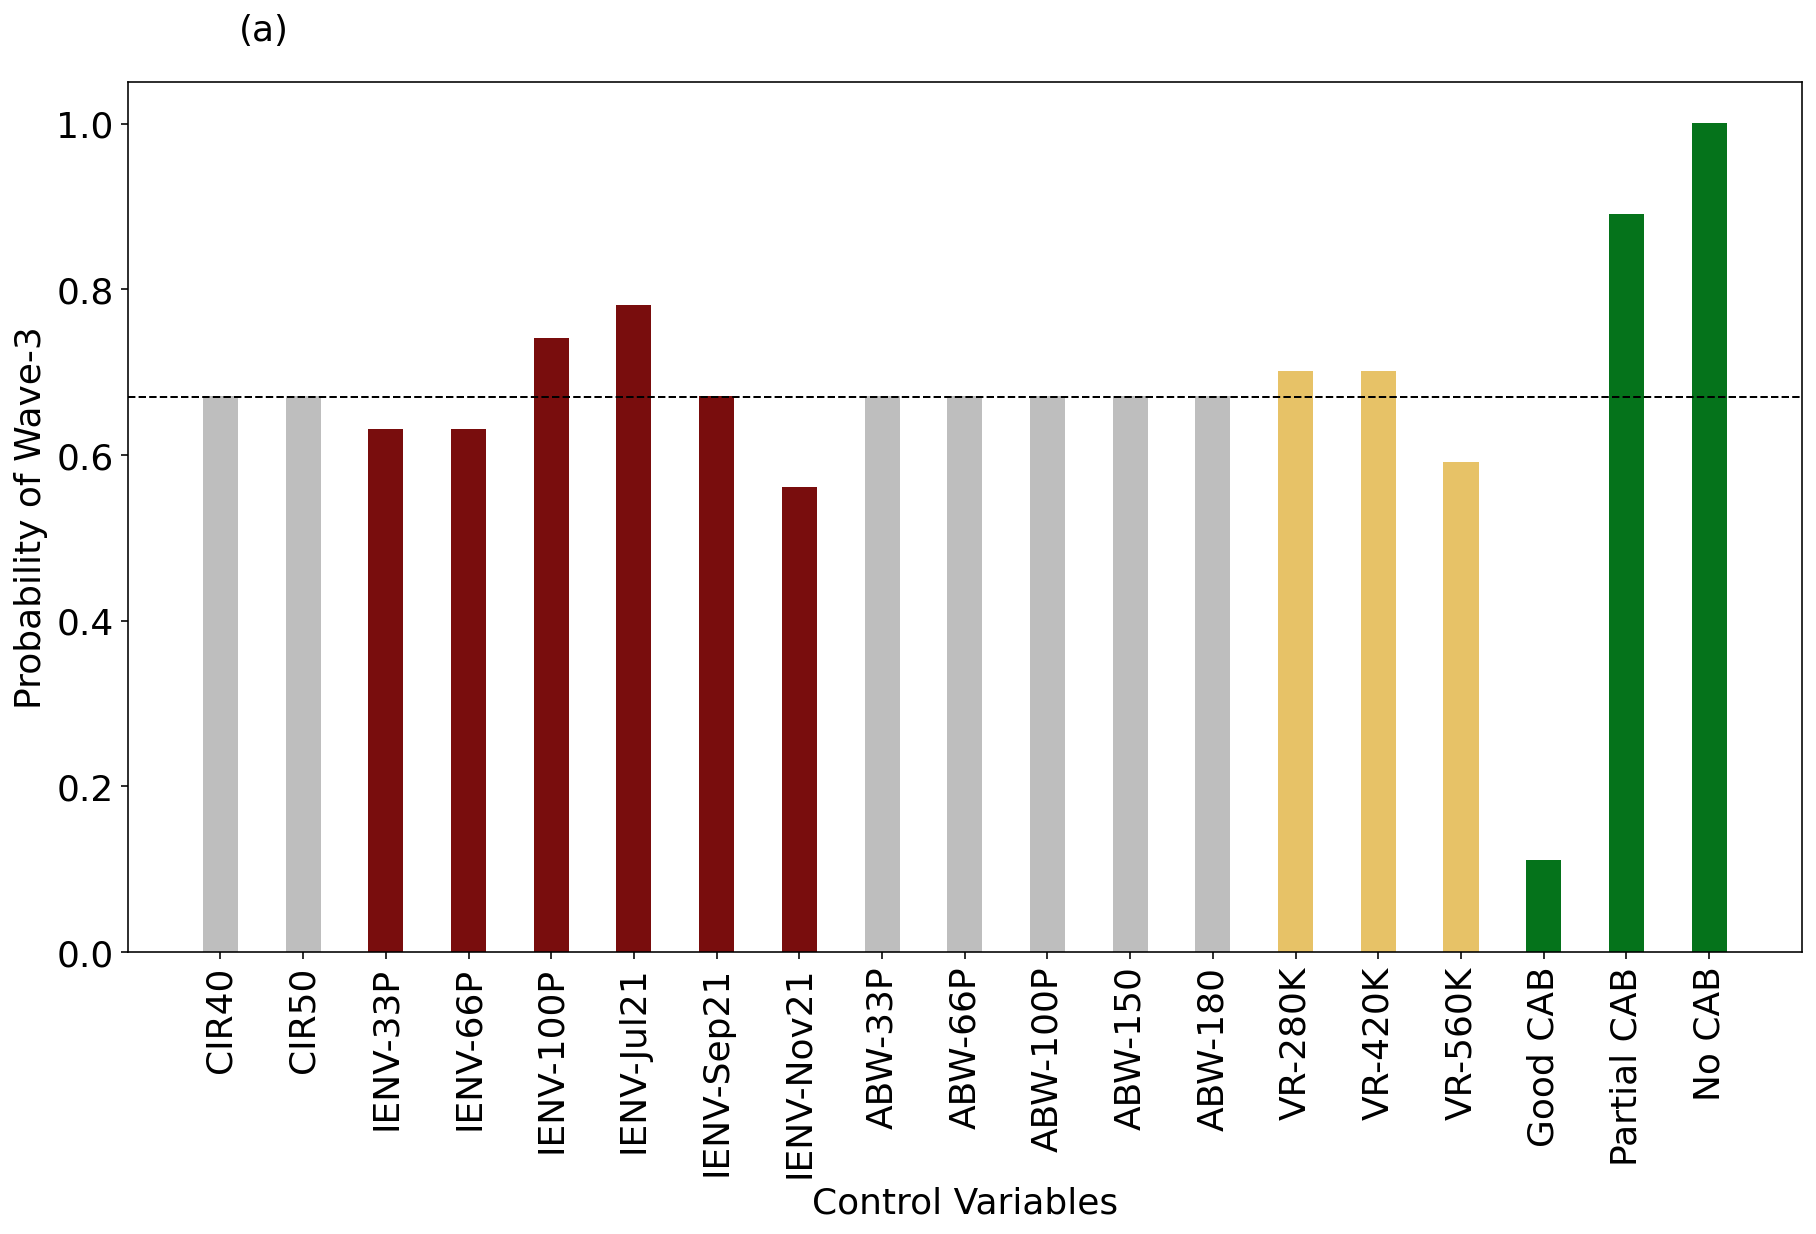

In [ ]:
############################################ Generate Single-Effect Barplot ############################################ 
bar_list_param=["CIR40","CIR50","0_33", "0_66","1_00","ImmunEscp_Jul","ImmunEscp_Sep","ImmunEscp_Nov","0_33", "0_66","1_00","ABW150Days" ,"ABW180Days","Vaccine_PresentRate", "Vaccine_BestWeekAvg","Vaccine_TwicePresent","SD_RA","SD_RAR","SD_RARF"]
bar_list_head=["CIR","CIR","KDPwsat1","KDPwsat1","KDPwsat1","KDPwsat2","KDPwsat2","KDPwsat2","KDPg1","KDPg1","KDPg1","KDPg2","KDPg2","Vaccine Rate","Vaccine Rate","Vaccine Rate","SD","SD","SD"]
bar_list_label=["CIR40","CIR50","IENV-33P", "IENV-66P","IENV-100P","IENV-Jul21","IENV-Sep21","IENV-Nov21","ABW-33P", "ABW-66P" ,"ABW-100P","ABW-150" ,"ABW-180","VR-280K", "VR-420K","VR-560K","Good CAB","Partial CAB","No CAB"]
barWaveProbArray = np.zeros(len(bar_list_param))
color = ["#790d0d","#e7c267","#05731b","#bebebe"]
df_bar=df_active.copy(deep=True)

#Calculate probability of Wave-3 given single control variable
for i in range(len(bar_list_param)):
    df_bar1 = df_bar[df_bar[bar_list_head[i]]==bar_list_param[i]]
    totalCases = df_bar1.shape[0]
    df_bar2 = df_bar1[df_bar1["Date Of Peak"] != NOWAVEPEAKDATE]
    wave3Cases = df_bar2.shape[0]
    barWaveProbArray[i]=round((wave3Cases/totalCases),2)

SMALL_SIZE = 18
plt.rcParams['xtick.labelsize'] = SMALL_SIZE
plt.rcParams['ytick.labelsize'] = SMALL_SIZE
plt.rcParams['axes.labelsize']=SMALL_SIZE

plt.rcParams["font.serif"]

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title    
fig = plt.figure(figsize = (15, 8))
 
# creating the bar plot
barplot=plt.bar(bar_list_label, barWaveProbArray, color ='maroon',
        width = 0.4)
for i in range(len(bar_list_head)):
    if(bar_list_head[i]=="KDPwsat1" or bar_list_head[i]=="KDPwsat2"):
        barplot[i].set_color(color[0])
    elif(bar_list_head[i]=="Vaccine Rate"):
        barplot[i].set_color(color[1])
    elif(bar_list_head[i]=="SD"):
        barplot[i].set_color(color[2])
    else:
        barplot[i].set_color(color[3])

#0.67 is threshold probability value
plt.axhline(y=0.67,linewidth=1, color='k',linestyle='--')

plt.xticks(rotation=90) 
plt.xlabel("Control Variables")
plt.ylabel("Probability of Wave-3")

plt.text(.22,1.1,'(a)',horizontalalignment='left',size=SMALL_SIZE)
name ="Output_Files/Images/Wave3_BarPlot" + ".png"
plt.savefig(name,dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
####### DEFNITION ######################
## @@ Wave Heat Map probability ###


SIZE = 16

plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams['xtick.labelsize'] = SIZE
plt.rcParams['ytick.labelsize'] = SIZE
plt.rcParams['xtick.labelsize'] = SIZE
plt.rcParams['ytick.labelsize'] = SIZE
plt.rcParams['axes.labelsize']=SIZE



plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title


def HeatPlotDataGenerator(DataFrame,list_param,list_head,list_label):
    ## list of Parameter

    ## Arrays to Store probabilitites
    noWaveProbArray = np.zeros(shape=(len(list_param),len(list_head)))
    waveProbArray = np.zeros(shape=(len(list_param),len(list_head)))
    MedianNumberAtPeak = np.zeros(shape=(len(list_param),len(list_head)))

    # Copy of Dataframe
    df_heat_master = df_active.copy(deep=True)
    
    for i in range(len(list_param)):
        for j in range(len(list_param)):
            df_heat1 = df_heat_master[(df_heat_master[list_head[i]] == list_param[i]) & (df_heat_master[list_head[j]] == list_param[j]) ]            
            
            totalCases = df_heat1.shape[0]
            
            
            if((list_head[i] == list_head[j]) and (i != j)):
                noWaveProbArray[i][j] = 10;
                waveProbArray[i][j]   = 10;
                MedianNumberAtPeak[i][j] = 50;
            
            if(totalCases):
                ## remove no wave scenarios
                df_heat2 = df_heat1[df_heat1["Date Of Peak"] != NOWAVEPEAKDATE]

                wave3Cases    = df_heat2.shape[0]
                noWave3Cases  = totalCases - wave3Cases

                ratioWave3    = wave3Cases/totalCases
                ratioNoWave3  = noWave3Cases/totalCases

                noWaveProbArray[i][j] = ratioNoWave3
                waveProbArray[i][j]   = ratioWave3
                if(wave3Cases !=0):
                    MedianNumberAtPeak[i][j] = np.log10(statistics.mean(df_heat2["Number At Peak"]))
                
            
    return MedianNumberAtPeak,noWaveProbArray,waveProbArray
    

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    ax.set_facecolor('blue')
    # Create colorbar
    lab=[r"$10^{4}$","",r"$10^{5}$","",r"$10^{6}$",r"$10^{6.5}$"] 
    tick=[4,4.5,5,5.5,6,6.5]
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",size=SIZE)
    cbar.ax.set_yticks(tick)
    cbar.ax.set_yticklabels(lab,size=SIZE)
    
   


    
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    
        
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")
    # Turn spines off and create white grid.
    
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="#E5E4E2", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    

    return im, cbar


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


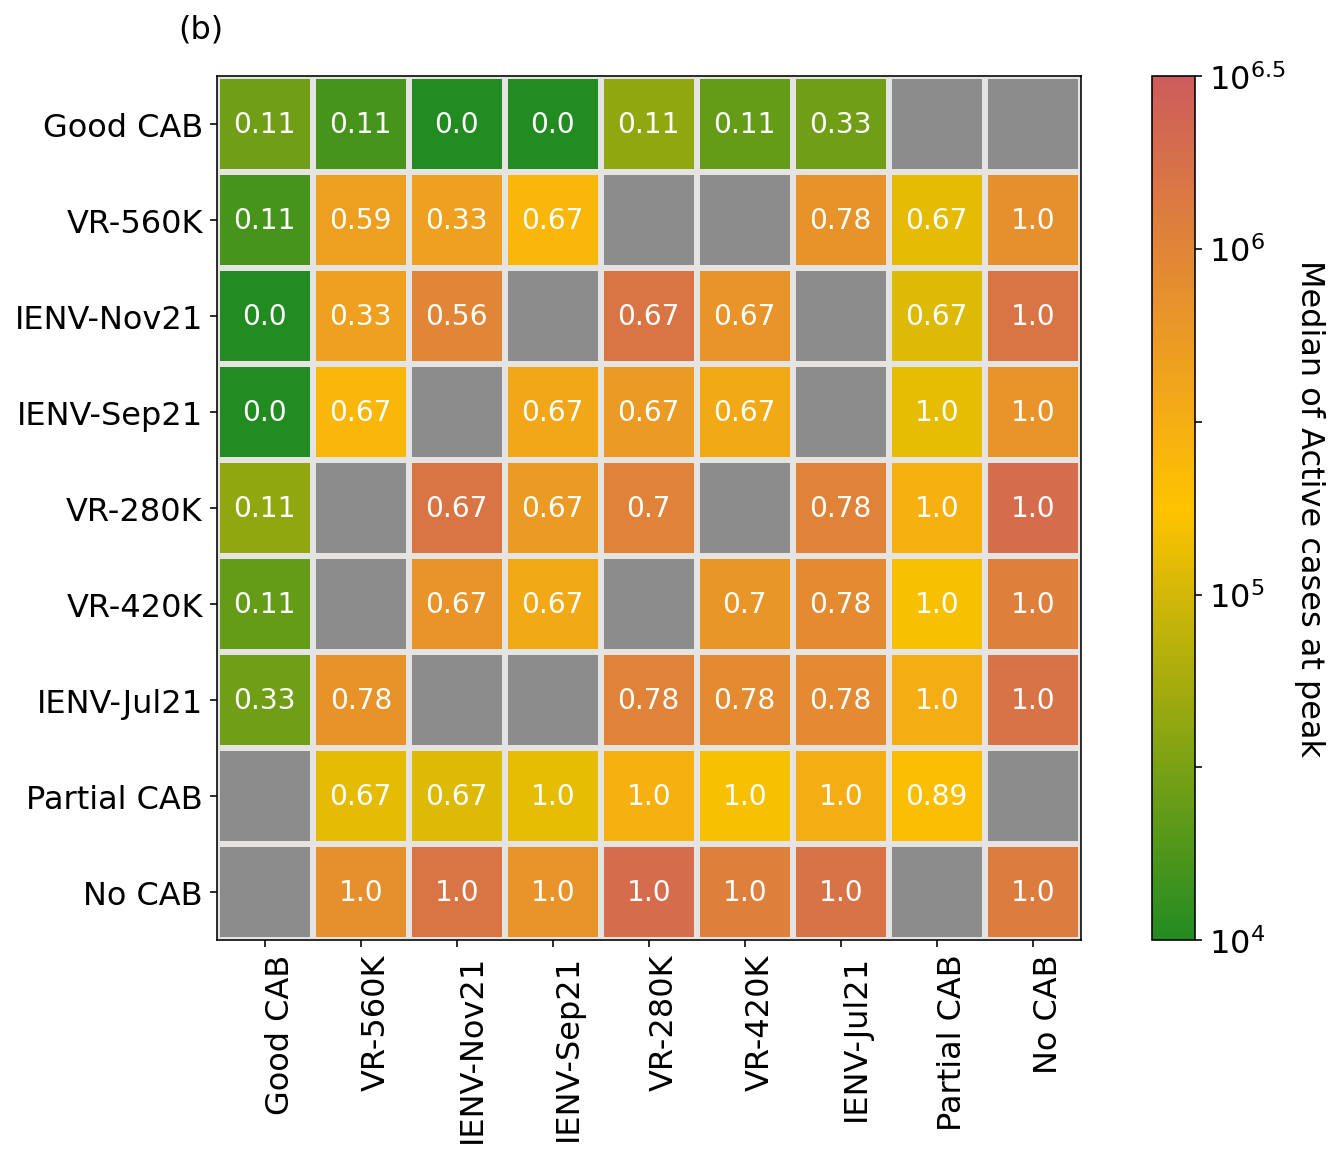

In [ ]:
###### PLOTTER SCRIPT #######
## Heat Wave Plotter ######


def HeatwavePlotter(DataFrame,list_param,list_head,list_label,PlotExtension,BoolProbability,boolNumbers):
    
    numatpeak, noWaveArray,waveArray = HeatPlotDataGenerator(DataFrame,list_param, list_head,list_label)   
    
    fig, ax = plt.subplots(figsize=[11,8])
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#228B22","#FFC300","#CD5C5C"])
    cmap.set_over('#8b8c8b')

    flat=numatpeak.flatten()
    flat.sort()
    flat= np.unique(flat)
    maxVal = flat[-2]
    
    if(not BoolProbability):
        im, cbar = heatmap(numatpeak, list_label, list_label, ax=ax,
                           cmap=cmap, cbarlabel="Median of Active cases at peak",vmin=4, vmax=6.5)
    else:
        im, cbar = heatmap(waveArray, list_label, list_label, ax=ax,
                           cmap=cmap, cbarlabel="Conditional probability of wave-3 occurance",vmin=0, vmax=1)
    
    ax.set_facecolor('blue')

    if(boolNumbers):
        for i in range(len(list_param)):
            for j in range(len(list_head)):
                if(waveArray[i][j] != 10):
                    num = np.round(waveArray[i][j],2)
                    strnum = str(num)
                    strnum = strnum[:4]
                    text = ax.text(i, j, strnum,
                                   ha="center", va="center", color="w",size=SIZE-2)

    fig.tight_layout()
    
    plt.text(-0.9,-0.9,'(b)',size=SIZE)
    name ="Output_Files/Images/Wave3_HeatMap_" + PlotExtension + ".png"
    plt.savefig(name,dpi=500,bbox_inches='tight')
    plt.show()
    
list_param=["SD_RA", "Vaccine_TwicePresent", "ImmunEscp_Nov","ImmunEscp_Sep","Vaccine_PresentRate", "Vaccine_BestWeekAvg","ImmunEscp_Jul" ,"SD_RAR","SD_RARF"]
list_head=["SD","Vaccine Rate","KDPwsat2","KDPwsat2","Vaccine Rate","Vaccine Rate","KDPwsat2","SD","SD"]   
list_label=["Good CAB","VR-560K", "IENV-Nov21","IENV-Sep21","VR-280K", "VR-420K","IENV-Jul21","Partial CAB","No CAB"]

# HeatwavePlotter(df_active,list_param,list_head,list_label,"ProbCasesAtPeak_Short",True,True)
HeatwavePlotter(df_active,list_param,list_head,list_label,"NumCasesAtPeak",False,True)

##3.2 Wave-3 peak date and active caseload
The quantities of interest for policymaking are the peak date and active caseload at peak. Now, we proceed to analyze these two quantities in different scenarios corresponding to the primary causal factors identified above. 
Fig.2 shows a scatter plot between the date of Wave-3's peak and active caseload at peak for different scenarios. A special axis entry for No Wave (NW) is used to depict the scenarios that do not show a new wave. The arrangement and color of scatter markers in the figure help us visualize the joint-effect of adherence to COVID-appropriate behaviour by the public, IENV emergence and reinfection fraction, vaccination rate, and CIR in the population on caseload and date of peak. Each panel (a-i) in Fig.2 shows only those scenarios in which the variable mentioned in the column (CAB) and the row (IENV emergence time) are active. For example, panel (a) shows all the scenarios where the CAB is set to "Good" level and IENV emergence time is set to July 2021. Within the panel, each point represents a particular scenario. Each scenario is colored by the vaccination rate, marked by a marker that represents the IENV reinfection fraction, and the border is colored by the CIR.

First, we see that for scenarios with Good CAB (panels a,d,g), the active case at the peak is lower.
Significantly, scenarios with Good CAB and IENV emergence time beyond September 2021 (panels d,g) do not see a new wave. In panel (a), we see a peak only when 100\% IENV reinfection occurs, and the other two reinfection fractions do not lead to a new wave. This result shows that Good CAB is the primary intervention strategy for preventing COVID waves, a well-known fact.  However, in reality, the financial and livelihood requirements to reopen economies will result in a relaxation of CAB, and only a Partial CAB is likely to be followed. In those scenarios with partial CAB (panels b,e,h), if an immune escape new variant emerges in July 2021 or September 2021, Wave-3 is inevitable in Karnataka.
Moreover, we see that vaccination rate is the key governing factor that reduces the active caseload at peak. Crucially, reaching a vaccination level of 580k per day in Karnataka will ensure no Wave-3 if no immune escape new variant starts spreading in the population before November 2021. A higher CIR (meaning lower reported cases during Wave-2) will result in a delayed peak but at the same active caseload as seen by the clustering among the same color and marker shapes. 
![Fig 2](https://raw.githubusercontent.com/divijghose/COVID_Wave3_IISc/main/Images/Scatter_TotalActive_Group.png)
*Fig 2. Scatter plot of active cases at the peak of Wave-3 v/s the date of peak for different scenarios of CAB    and   timing of the immune-escape variant with different vaccine rates.*

To complete the analysis, we look at the scenarios with no CAB. Under these scenarios, we expect the highest levels of the caseload at peak and an assured emergence of new COVID waves in Karnataka. Fortunately, we see that vaccination reduces the caseload but does not prevent the inevitable Wave-3. The reinfection fraction significantly affects the caseload in the No CAB, IENV-Jul'21 scenarios (panel c). We see wide distribution in the caseload at the peak but a narrow distribution in the peak date. 


To further understand Wave-3 properties from the perspective of vaccination, Fig.3shows the probability distribution function of peak date and active cases at peak for different vaccination rates. Here, we only look at the scenarios resulting in a Wave-3 and ignore those that do not lead to a Wave-3. We see that almost all the distribution curves are multi-modal, indicating the cross effects of CAB and IENV reinfection rates. It is evident from Fig. 3 that the emergence of a new immune-escape variant is likely to be followed by a third wave within 45 to 60 days. In most cases, a higher vaccination rate helps to bring down the active caseload at its peak. Doubling the daily vaccination rate (VR-560K, Fig.3(c),(f)) results in fewer scenarios with Wave-3 despite the emergence of an immune-escape new variant in November.  

![Fig 3](https://raw.githubusercontent.com/divijghose/COVID_Wave3_IISc/main/Images/probdist.png)
*Fig. 3 The probability of the predicted date of peak, the number of active cases and the number of confirmed cases on the day of peak for different vaccination rates and timing of emergence of immune-escape new variants, i.e., in Jul’21, Sep’21 and Nov’21.*

Table 1 shows a summary of the median peak date, inter-quartile range of peak date and the minimum and maximum active caseload during this period of inter-quartile range for scenarios with specific combinations of IENV emergence time and vaccination rates. This table can be used as a ready reference for policymaking.


![Table 1](https://raw.githubusercontent.com/divijghose/COVID_Wave3_IISc/main/Images/table1.png)
*Table 1. Statistics for total active cases and the date of the peak at various vaccine rates, and COVID-appropriate behaviour. The first value in the cell is the  median date of peak and the mean value of active cases on the median date of peak, followed by the first and third quartile values for the date of peak, and the minimum and the maximum number of active cases in the inter-quartile range.*

In [ ]:
###--- PLOTTER ----     ####
### @@ GROUP SCATTER PLOTTER    ###
def SCATTER_plotter_Group(df_active):
    
    
    fig, ax = plt.subplots(3,3,figsize=(11,8),sharex=True,sharey=True)

    ####### -- PLotter Parameters -- ######
    plt.rcParams["text.usetex"] = False
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Computer Modern"]
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14

    SIZE = 14


    plt.rc('font', size=SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SIZE)    # legend fontsize
    plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title

    xtl = []
    xt = [396,457,518,580,639,700]   ## 1st days of the months hardcoded 
    xtl = ['Aug\n\'21','Oct\n\'21','Dec\n\'21','Feb\n\'22','Apr\n\'22','NW']



    ## Set plotting parameters   -- Number at Peak
    markersizep = 1.9
    nTicks_C = 10
    startDay_C = 0
    endDay_C = 4e6
    xt_C = [2000,1e4,1e5,1e6,1e7,1e8]
    xtl_C = ["NW",r"$10^{4}$",r"$10^{5}$",r"$10^{6}$",r"$10^{7}$",r"$10^{8}$"];
    

    #### PLotting Colors and other Parameters 
    edgeColor = ['#A71535','black']
    listSubplot = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
    alphaVal = [1,0.3]
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    marker  = ['v','o','^']
    kernel = 'epanechnikov'
    KDPCIR=["CIR 40", "CIR 50"]
    KDPImm = ["IENV-Jul21","IENV-Sep21","IENV-Nov21"]
    Vacc=["VR-280K","VR-420K","VR-560K"]
    KDP_lambda_Array = ["Good CAB" ,"Partial CAB","No CAB"]
    BackGroundColor = ["#ffffff","#ffffff","#ffffff","#ffffff"]
    JitterDate = 0.015
    JitterNum = 0.00000009
 
    df_kde_Jitter=df_active.copy(deep=True)

    ########## DANGERRRRRRRRRRRRRR ----- Changing the no wave Peak Date to be 700 ----- #########################
    df_kde_Jitter.loc[df_kde_Jitter['Date Of Peak'] == NOWAVEPEAKDATE, 'Date Of Peak'] = 700
    df_kde_Jitter.loc[df_kde_Jitter['Number At Peak'] == NOWAVEPEAKNUMBER, 'Number At Peak'] = 2000
    

    for i in range(3):      #Immune Escape
        for j in range(3):  #  SD Factor
            df_kde=df_kde_Jitter.copy(deep=True)

            
            df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
            
            df_kde = df_kde[df_kde['SD']==KDP_lambda_name[j]]          
            
                
            for k in range(3):
                df_kdep = df_kde.copy(deep=True)

                df_kdep=df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]]
                    
                for l in range(3):
                    df_kdepp = df_kdep.copy(deep=True)
                    df_kdepp=df_kdepp[df_kdepp['KDPwsat1']==KDP_w_sat_1_name[l]]
                    
                    for m in range(2):
                        df_kdeppp = df_kdepp.copy(deep=True)
                        df_kdeppp = df_kdeppp[df_kdeppp["CIR"] == KDP_nu_name[m]]
                        
                        scat = sns.scatterplot(ax=ax[i,j],x='Date Of Peak',y='Number At Peak',data=df_kdeppp,color=colorVal[k],label=KDPImm[k],marker=marker[l],linewidth=1.5,s=100,markers=True,edgecolor = edgeColor[m])

                plt.yscale(value="log")
            ax[i,j].set_xticks(xt);
            ax[i,j].set_xticklabels(xtl,rotation=0,ha="center",position=(200,.00),size=SIZE);
            ax[i,j].set_yticks(xt_C);
            ax[i,j].set_yticklabels(xtl_C,size=SIZE);
            ax[i,j].text(.08,.9,listSubplot[i*3 + j],horizontalalignment='left',transform=ax[i,j].transAxes)
            
            ax[i,j].legend(title='Vaccination Rate',fancybox=True,ncol=2)
            handles, labels = ax[i,j].get_legend_handles_labels()
            ax[i,j].set_ylim([1e3,1e8])
            ax[i,j].get_legend().remove()
 
            ax[i,j].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,j].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.5)
            
            ## ABckground Color
            ax[i,j].set_facecolor(BackGroundColor[j]);
    
    ## Add the y labels in 1st Column
    for i in range(3):
        ax[i,0].set_ylabel("Active at peak")
        ax[i,0].text(-.38,.2,KDPImm[i],transform=ax[i,0].transAxes,rotation=90)
        
    
    ## Add the x axis labels in last row
    for j in range(3):  
        ax[2,j].set_xlabel("Date of peak")
        ax[0,j].text(0.33, 1.05,KDP_lambda_Array[j],transform=ax[0,j].transAxes)

 
    TitleHandle = [plt.plot([],marker="", ls="")[0]] # Canvas

    labels = list(range(0,18))

    handles_new = []
    labels_new = []
    
    ## SHAPES
    a1 = mlines.Line2D([], [], color='#333333', marker='v', linestyle='None',
                          markersize=10, label='Blue stars',fillstyle='none')
    a2 = mlines.Line2D([], [], color='#333333', marker='o', linestyle='None',
                              markersize=10, label='Blue stars',fillstyle='none')
    a3 = mlines.Line2D([], [], color='#333333', marker='^', linestyle='None',
                              markersize=10, label='Blue stars',fillstyle='none')
    # colorVal = ['#7aa6c2','#4acf94','#b99bce']
    ## COlors
    b1 = mlines.Line2D([], [], color='#7aa6c2', marker='o', linestyle='None',
                          markersize=10, label='Blue stars')
    b2 = mlines.Line2D([], [], color='#4acf94', marker='o', linestyle='None',
                              markersize=10, label='Blue stars')
    b3 = mlines.Line2D([], [], color='#b99bce', marker='o', linestyle='None',
                              markersize=10, label='Blue stars')
    
    ##CIR
    c1 = mlines.Line2D([], [], color=edgeColor[0], marker='^', linestyle='None',linewidth=6.5,markeredgewidth=1.5,
                          markersize=10, label='Blue stars',fillstyle='none')
    c2 = mlines.Line2D([], [], color=edgeColor[1], marker='^', linestyle='None',linewidth=6.5,markeredgewidth=1.5,
                              markersize=10, label='Blue stars',fillstyle='none')
    
    c1 = mlines.Line2D([], [], color=edgeColor[0], marker='^', linestyle='None',linewidth=6.5,markeredgewidth=1.5,
                          markersize=10, label='Blue stars',fillstyle='none')
    c2 = mlines.Line2D([], [], color=edgeColor[1], marker='^', linestyle='None',linewidth=6.5,markeredgewidth=1.5,
                              markersize=10, label='Blue stars',fillstyle='none')
    
    handles_new.extend((a1,b1,c1))
    labels_new.extend(("33%","280K","CIR-40" ))
    
    ## Shapes
    handles_new.extend((a2,b2,c2))
    labels_new.extend(("66%","420K","CIR-50" ))
    
    ## Border
    handles_new.extend((a3,b3))
    labels_new.extend(("100%","560K"))
    
    plt.legend(handles_new, labels_new,title='',ncol=3,bbox_to_anchor=(-0.2,-0.45),loc='upper center',frameon=False)
    plt.subplots_adjust(wspace=0.06, hspace=0.12)
    ax[2,0].text(-0.,-0.60,"IENV Re-infection %   (Shapes) :",transform= ax[2,0].transAxes)
    ax[2,0].text(-0.,-0.75,"Vaccination Rate        (Color)    :",transform= ax[2,0].transAxes)
    ax[2,0].text(-0,-0.90,"CIR                             (Border)  :",transform= ax[2,0].transAxes)
    
    name = "Output_Files/Images/Wave3_ScatterPlot.png" 
    plt.savefig(name,dpi=500,bbox_inches='tight')

    plt.show()

SCATTER_plotter_Group(df_active)

In [ ]:
### ---- FUNCTION DEFINITION  ----   ####
### @@ Data Generator - Probably Distribution ###
# DATA GENERATOR - NUMBER OF CASES

def GenerateData(df_active,YColumn,Bandwidth,N_bins,LinePLotVals_Cases,LinePLotX_Cases,NoWaveRatio,boolHist):
    fig, ax = plt.subplots(3,2,figsize=(11,8))
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    kernel = 'epanechnikov'
    KDPCIR=["CIR= 40", "CIR= 50"]
    KDPImm=["EEscape Period - July","Escape Period - September", "Escape Period  - November"]
    legend = ["Present Rate","1.5x Present Rate","2x Present Rate"]
    
    
    
    for i in range(3):
        for j in range(2):
            df_kde=df_active.copy(deep=True)
            
            df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
            
            #index for storing Lineplot arrays
            plotIndex = 0
            
            for k in range(3):
                df_kdep = df_kde.copy(deep=True)
                df_kdep = df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]].copy(deep=True)
                
                TotalRows = df_kdep.shape[0]   ### NUmber of Rows for this Selected Scenario
                
                ### Remove Rows With DATE_OF_PEAK = 670
                df_kdep = df_kdep[df_kdep['Date Of Peak']!=NOWAVEPEAKDATE].copy(deep=True)
                
                ### Remove the rows with NUmber at Peak < 500 
                df_kdep = df_kdep[df_kdep['Number At Peak']>200].copy(deep=True)
                

                TruncatedRows = df_kdep.shape[0]
                
                
                hist = sns.histplot(ax=ax[i,j],data=df_kdep,x=YColumn,stat='probability',\
                                    kde=True,label=legend[k],kde_kws={"bw_adjust":Bandwidth},
                                    color=colorVal[k],bins=N_bins)
                
 
                ratio = TruncatedRows/TotalRows    #### Compute Ratio of Wave Scenarios
                
                ratioNoWave = 1.0 - ratio;
                    
                
                               
                if(len(hist.get_lines()) == plotIndex+1):
                    ll = hist.get_lines()[k].get_data()
                    LinePLotVals_Cases[i][j][k] = np.asarray(ll[1])
                    LinePLotX_Cases[i][j][k] = np.asarray(ll[0])

                    LinePLotVals_Cases[i][j][k] *=  ratio
                    NoWaveRatio[i][j][k]         =  ratioNoWave
                    
                    plotIndex += 1
                
                else:     ##### No Cases Available
                    print("SOMETHING WRONG")
                    NoWaveRatio[i][j][k]        =   ratioNoWave
                    LinePLotVals_Cases[i][j][k] =   np.zeros(len(LinePLotVals_Cases[i][j][k]))
                    LinePLotX_Cases[i][j][k]    =   np.asarray(hist.get_lines()[0].get_data()[0])

                
                if(not boolHist):
                    ax[i,j].containers[0].remove() # remove the bars
                else:
                    ax[i,j].legend(loc='upper right')
                    handles, labels = ax[i,j].get_legend_handles_labels()
                
                
                ax[i,j].set_title(KDPImm[i]+", "+ KDPCIR[j])
                ax[i,j].set_xlabel(YColumn)

    plt.tight_layout()
    plt.close()


In [ ]:
###-FUNCTION DEFINITION####
### @@ CIR PLOTTER - Generate Line Plots ###

def CIR_plotter3x3(LinePLotVals_Cases,LinePLotX_Cases,LinePLotVals,LinePLotX,LinePLotVals_Con,LinePLotX_Con, \
               NoWave_NumCases_Ratio,Nowave_DOP_Ratio,NoWave_NumCases_Ratio_Con): 
    for cirv in range(1):
        CIRVARIANT = cirv;
        
        ####### -- PLotter Parameters -- ######
        plt.rcParams["text.usetex"] = False
        plt.rcParams["font.family"] = "serif"
        plt.rcParams["font.serif"] = ["Computer Modern"]
        plt.rcParams['xtick.labelsize'] = 8
        plt.rcParams['ytick.labelsize'] = 8

        SMALL_SIZE = 14
        MEDIUM_SIZE = 14
        BIGGER_SIZE = 14

        plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

        ## Set plotting parameters   -- Day of Peak
        markersizep = 5
        xtl = []   
        xt = [396,427,457,488,518,549,580,608,639]   ## 1st days of the months hardcoded 
        xtl = ['    Aug\'21','','    Oct\'21','','Dec\'21','','Feb\'22','','Apr\'22']


        ## Set plotting parameters   -- Number at Peak
        markersizep = 5
        nTicks_C = 10
        startDay_C = 0
        endDay_C = 4e6    
        xt_C = [2,3,4,5,6,7]
        xtl_C = [r"        $10^{2}$","",r"   $10^{4}$","",r"    $10^{6}$",""]#,r"    $10^{8}$" ];
   
        ## COMMON PLOTTING PARAMETERS
        markeveryVal = 15
        alphaVal = 0.3

        if(CIRVARIANT==0):
            y_limCol1_Val = 0.35
            y_limCol2_Val = 0.25
            y_limCol3_Val = 0.25
        else:
            y_limCol1_Val = 0.35
            y_limCol2_Val = 0.25
            y_limCol3_Val = 0.25

        fig, ax = plt.subplots(3,2,figsize=(11,8),sharex=False,sharey=False)
        fig.tight_layout()
        
        colorVal = ['#7aa6c2','#4acf94','#b99bce']
        marker  = ['o','h','^']
        legend = ["VR-100P","VR-150P","VR-200P"]
        KDPImm = ["IENV-Jul21", "IENV-Sep21","IENV-Nov21" ]
        subfig=["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)","(m)","(n)","(o)"]
        KDPCIR = ["CIR40", "CIR50"]
        sfg=0
        ## MaxValueLegend 
        MaxValueLegend = [];
                 
        j=CIRVARIANT;
        col=0
        for i in range(3):
            for k in range(3):
                ax[i,col].plot(LinePLotX[i][j][k],LinePLotVals[i][j][k],label = legend[k],linewidth=0.75,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=markeveryVal)

                ax[i,col].fill_between(LinePLotX[i][j][k],LinePLotVals[i][j][k],0, alpha=alphaVal, color=colorVal[k])
                MaxValueLegend.append(max(LinePLotVals[i][j][k]))
                
                BarChartX = LinePLotX[i][j][k].copy()
                
                ##Generate Bar for no Wave Scenario
                # Get the current X array and then append last x as WAVEPEAKDATE  ( x Value )
                # Generate a data with zeros, and append the last value of data as Prob for no peak
                lenX                               =  len(BarChartX)
                PrevXVal                           =  BarChartX[lenX - 1]
                freq                               =  Nowave_DOP_Ratio[i][j][k]
                BarData                            =  np.full(shape=len(BarChartX), fill_value=0.0,dtype=np.float)
                BarChartX[lenX - 1]                =  NOWAVEPEAKDATE + k*8
                BarData[lenX - 1]                  =  freq   
                
                LinePLotX[i][j][k][lenX - 1]      = PrevXVal
                
                #Append MaxValue to legend Array
                MaxValueLegend.append(freq)
                
                
                
            ax[i,col].legend(title='Vaccination Rate',loc='upper right')
            ax[i,col].text(.88,.82,subfig[sfg],horizontalalignment='right',transform=ax[i,col].transAxes)
            sfg+=1
            ax[i,col].set_ylabel(KDPImm[i]+"""\nP(D)""")
            
            
            
            ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
            ax[i,col].set_ylim((0,y_limCol1_Val))
            ax[i,col].set_xticks(xt);
            ax[i,col].set_xticklabels([]);
            handles, labels = ax[i,col].get_legend_handles_labels()
            ax[i,col].get_legend().remove()
            ax[i,col].get_yaxis().set_label_coords(-0.16,0.5)
            ax[i,col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

        ax[2,col].set_xlabel("""Date of peak (D)""")
        ax[2,col].set_xticks(xt);
        ax[2,col].set_xticklabels(xtl);
        ax[2,col].tick_params(axis='x', rotation=30);


        ### --- NUMBER OF CASES ----- ######

        col=1
                 
        MaxValueLegend = []

        for i in range(3):
            for k in range(3):
                ax[i,col].plot(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],label = legend[k],linewidth=0.75,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=markeveryVal)
                ax[i,col].fill_between(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],0, alpha=alphaVal, color=colorVal[k])
                
                MaxValueLegend.append(max(LinePLotVals[i][j][k]))
                
                BarChartX                          =  LinePLotX[i][j][k].copy()
                
                ##Generate Bar for no Wave Scenario
                # Get the current X array and then append last x as WAVEPEAKDATE  ( x Value )
                # Generate a data with zeros, and append the last value of data as Prob for no peak
                lenX                               =  len(BarChartX)
                PrevXVal                           =  BarChartX[0]
                freq                               =  NoWave_NumCases_Ratio[i][j][k]
                BarData                            =  np.full(shape=len(BarChartX), fill_value=0.0,dtype=np.float)
                BarChartX[0]                       =  0 + k*0.2 + 0.1
                BarData[0]                         =  freq   
                
                LinePLotX[i][j][k][0] = PrevXVal
                
                #Append MaxValue to legend Array
                MaxValueLegend.append(freq)
                
            
            ax[i,col].legend(title='Vaccination Rate',loc='upper right')
            ax[i,col].text(.88,.85,subfig[sfg],horizontalalignment='right',transform=ax[i,col].transAxes)
            sfg+=1
            ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
            
            ax[i,col].set_xticks(xt_C);
            ax[i,col].set_xlim([3,7]);
            ax[i,col].set_xticklabels([]);
            ax[i,col].set_ylim((0,y_limCol2_Val))
            ax[i,col].set_ylabel("""P(A)""")
            handles, labels = ax[i,col].get_legend_handles_labels()
            ax[i,col].get_legend().remove()
            ax[i,col].get_yaxis().set_label_coords(-0.16,0.5)
            ax[i,col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            

        
        ax[2,col].set_xlabel("""Daily active cases at peak (A)\n\n\n\nDaily confirmed cases at peak (C)""")
        xt_C1 = [3,4,5,6,7]
        xtl_C1 = [r"$10^{3}$","",r"$10^{5}$","",r"$10^{7}$"]
        ax[2,col].set_xticks(xt_C1);
        ax[2,col].set_xticklabels(xtl_C1);
        ax[2,col].tick_params(axis='x', rotation=0);
        
        
        ax3=ax[2,col].twiny()
        ax3.spines["top"].set_position(("axes", -0.57))

        ax3.set_xlim([2,6]);
        ax3.set_xticklabels([])

        xt_C2 = [2,3,4,5,6]
        xtl_C2 = [r"$10^{2}$","",r"$10^{4}$","",r"$10^{6}$"]
        ax3.set_xticks(xt_C2);
        ax3.set_xticklabels(xtl_C2);
        ax3.tick_params(axis='x', rotation=0);
        

        ax4=ax[0,1].twinx()
        ax4.set_ylabel("\nP(C)")
        
        ax4.set_ylim((0,y_limCol2_Val))
        ax4.set_yticklabels(["","",""]);
        ax4.tick_params(labelright=False)
        ax4.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax4.get_yaxis().set_label_coords(1,0.5)
        ax5=ax[1,1].twinx()
        ax5.set_ylabel("\nP(C)")
       
        ax5.set_ylim((0,y_limCol2_Val))
        ax5.set_yticklabels(["","",""]);
        ax5.tick_params(labelright=False)
        ax5.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax5.get_yaxis().set_label_coords(1,0.5)
        ax6=ax[2,1].twinx()
        ax6.set_ylabel("\nP(C)")
        
        ax6.set_ylim((0,y_limCol2_Val))
        ax6.set_yticklabels(["","",""]);
        ax6.tick_params(labelright=False)
        ax6.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax6.get_yaxis().set_label_coords(1,0.5)
        ph = [plt.plot([],marker="", ls="")[0]] # Canvas
        handles = ph + handles
        labels= ["Vaccination Rate:"]+labels
        fig.legend(handles, labels, loc=10,title='',ncol=4,bbox_to_anchor=(0.475,0.98),frameon=False,title_fontsize=15,fontsize=15)
        
        fig.tight_layout()
        fig.subplots_adjust(wspace=0.3,hspace=0.3,bottom=0.2)
        
        name = "Output_Files/Images/Wave3_ProbDistribution.png"            
        plt.savefig(name,dpi=500,bbox_inches='tight')
        
        plt.show()


In [ ]:
###--- PLOTTING CELL ####
### @@ CIR PLOT - Plot Probability Distribution   ###

############### Function for Plotting #####################################

def plotDataFrame3x3(DataFrameName,DataFrameName2):

    ## For Number of Cases    
    LinePLotVals_Cases = np.empty(shape=(3,2,3,200))
    LinePLotX_Cases = np.empty(shape=(3,2,3,200))

    ## For Date of Peak
    LinePLotVals = np.empty(shape=(3,2,3,200))
    LinePLotX = np.empty(shape=(3,2,3,200))
    
    ##For daily confirmed cases
    LinePLotVals_Con = np.empty(shape=(3,2,3,200))
    LinePLotX_Con = np.empty(shape=(3,2,3,200))
    
    
    ### For Storing Ratio of No Peak in Each cases
    NoWave_NumCases_Ratio = np.empty(shape = (3,2,3,1))
    Nowave_DOP_Ratio = np.empty(shape = (3,2,3,1))
    NoWave_NumCases_Ratio_Con = np.empty(shape = (3,2,3,1))
    
    
    ### Data for Number at Peak

    GenerateData(DataFrameName,'LogNumAtPeak',0.4,10,LinePLotVals_Cases,LinePLotX_Cases,NoWave_NumCases_Ratio,True)

    ### Data for Day of Peak

    GenerateData(DataFrameName,'Date Of Peak',0.4,10,LinePLotVals,LinePLotX,Nowave_DOP_Ratio,True)

    
    #####Data for daily confirmed

    GenerateData(DataFrameName2,'LogNumAtPeak',0.4,10,LinePLotVals_Con,LinePLotX_Con,NoWave_NumCases_Ratio_Con,True)

    ### PLot the values in seperate plots
    CIR_plotter3x3(LinePLotVals_Cases,LinePLotX_Cases,LinePLotVals,LinePLotX,LinePLotVals_Con,LinePLotX_Con,\
                NoWave_NumCases_Ratio,Nowave_DOP_Ratio,NoWave_NumCases_Ratio_Con)

plotDataFrame3x3(df_active,df_nucleation_total)


##3.3 Effect of Wave-3 on different age-groups
The data until 10 June 2021 shows that 4.2\%, 5\%, 53.2\%, 23\% and 14.645 \% of the people in the age groups 0--11, 12--17, 18--44, 45--59, and above 60 years were infected with COVID-19. However, India started an age-dependent vaccination drive for the 18+ population only. As such, for Wave-3, we expect a higher contribution to the daily confirmed caseload from children (0--17 years). To estimate this impact on different age groups, we analyze the age-wise daily confirmed caseload at Wave-3 peak and compare it with the corresponding numbers at Wave-2. Table.2 shows the statistics of the ratio between the 7-day average of daily confirmed cases of Wave-3 and Wave-2 peaks. The first line in each cell shows the ensemble mean with the 95\% confidence interval and the second line shows the ensemble median. We see that the children (0-17 years) are the worst affected due to the unavailability of the vaccine.  In the worst case,with VR-280K and IENV-Nov21, the daily confirmed  cases of children (0--11 years) at the Wave-3 peak will be on an average twenty times more than that of the daily confirmed  cases at Wave-3 peak. On an average, the impact of Wave-3 on children (0--17 years) would be seven times more than that of Wave-2.

![Table 2](https://raw.githubusercontent.com/divijghose/COVID_Wave3_IISc/main/Images/table2.png)

*Table 2. Predicted impact of Wave-3 on different age groups with different vaccination rates. The first value in the cell is the mean with the confidence interval of ratios of the 7-day average of confirmed cases at Wave-3 peak and Wave-2 peak, followed by the median.*

##3.4 Active Cases During May'21 - Jun'22
Fig. 4 shows the ensemble forecast of active cases in Karnataka from May 2021 to June 2022. Each panel shows the scenarios given a pair of CAB and IENV emergence-time control variables. The colored solid line is the mean value of the ensemble of active cases, and the shaded zone in the region of uncertainty (each color corresponds to a particular vaccination rate). The rows in Fig. 4 represent the good, partial, and no CAB, whereas the columns represent the emergence of IENV in Jul'21, Sep'21, and Nov'21, respectively. 
These plots confirm the observations from Sect. 3.2, but now showing a time series of the active caseload distribution.
As mentioned earlier, the scenarios with Partial CAB (middle row in Fig. 4) are likely to be followed due to the reopening of the economy including offices and educational institutions. The impact of the new wave will be more when it emerges early (Fig. 4 (d)).  At the peak of the new wave, the active caseload will be very high with the present vaccination rate, around 350K, when a new variant emerges before September 2021. If we assume that there is no antibody waning at least for 180 days, then, a new wave is predicted only at the beginning of next year, even if a new variant emerges before September 2021. In this case, the impact will be minimal. The benefits of increasing the vaccination rate can clearly be seen in Fig. 4 (e). Though a new wave is predicted in a few scenarios, the active caseload is very minimal with the doubled vaccination rate. If a new variant does not emerge until the end of October 2021, then a new wave can be suppressed by doubling the vaccination rate (Fig. 4 (f)). In this case, the study shows that the active caseload will be as high as 200K with the present vaccination rate even if the new variant emerges after October 2021. This finding emphasizes the necessity of vaccinating the entire population by December 2021. 


![Fig 4.](https://raw.githubusercontent.com/divijghose/COVID_Wave3_IISc/main/Images/relplot.png)

*Fig 4. Time series of Mean of active cases with 95\% Confidence Interval*



In [ ]:
###### PLOTTER SCRIPT ################
### REL PLot   #####


### Reshape DataFrame
def Relplotter(DataFrame, SD_Col_Val, plotExtension,ciBool, LegendOn, XLabelsOff,YScaleK,SDTag,Subfg):
    y_actual=mynewlist[301:len(mynewlist)]
    x_actual=np.arange(301,len(mynewlist))
    df_melt = DataFrame.copy(deep=True)
    listCol = list(DataFrame.columns.values)[731:]

    df_melt = df_melt.melt(id_vars=listCol, \
                var_name="Day", \
                value_name="Total")

    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['axes.labelsize']=18
    
    plt.figure(figsize=(3.5,8))
    plt.rcParams["font.serif"]
    SMALL_SIZE = 18
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 18

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    ### PLotting Parameters
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    Vacc=["VR-280K","VR-420K","VR-560K"]
    KDPImm = ["IENV-Jul21", "IENV-Sep21","IENV-Nov21" ]
    SDarr=['Good CAB','Partial CAB','No CAB']
    subfig=["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)","(m)","(n)","(o)"]
    ## Filter the Data
    sfg=Subfg
    df_melt=df_melt[df_melt['Day']>300]
    df_melt=df_melt[df_melt['SD']==SD_Col_Val]

    sns.set(style="ticks", rc={"lines.linewidth": 3})
    
    
    
    if(ciBool):
    ### Plotting Script
        relPlot = sns.relplot(data=df_melt, kind="line",
                            x="Day", y="Total",
                            hue="Vaccine Rate",col="KDPwsat2",palette=colorVal,facet_kws=dict(legend_out=False),err_kws={"alpha": .5})

    else:
        relPlot = sns.relplot(data=df_melt, kind="line",ci=None,
                            x="Day", y="Total",
                            hue="Vaccine Rate",col="KDPwsat2",palette=colorVal,facet_kws=dict(legend_out=False),err_kws={"alpha": .5})

    h,l = relPlot.axes[0][0].get_legend_handles_labels()
    relPlot.axes[0][0].legend_.remove()


    ## yTicks
    yt = [0,1,2,3,4,5,6,7,8]

    xt = [304,365,427,488,549,608,670,731]   ## 1st days of the months hardcoded 
    xtl = ['May\n\'21','Jul\n\'21','Sep\n\'21','Nov\n\'21', 'Jan\n\'22','Mar\n\'22','May\n\'22','Jul\n\'22']

    SDArr = {"SD_RA" : 0,
            "SD_RAR" : 0.1,
            "SD_RARF": 0.2}

    for c in range(1):
        relPlot.axes[c][0].set_ylabel("Active Cases",size = SMALL_SIZE)
        relPlot.axes[c][0].text(-.32,.35,SDTag,transform=relPlot.axes[c][0].transAxes,rotation=90,size=SMALL_SIZE)#, fontweight='bold')
        k = relPlot.axes[c][0].get_yticks()
        if (YScaleK):
            yt1=[0,1e5,2e5,3e5,4e5,5e5,6e5]
            ytl1=['0','','200K','','400K','','600K']
            relPlot.axes[c][0].set_yticks(yt1)                       ## YTicks 
            relPlot.axes[c][0].set_yticklabels(ytl1,size=16)                 ## YTick Labels
            relPlot.axes[c][0].get_yaxis().set_label_coords(-0.18,0.5)
               
        else:
            yt=[0,5e5,1e6,15e5,2e6,25e5,3e6,35e5,4e6]
            ytl=['0','','1M','','2M','','3M','','4M']
            relPlot.axes[c][0].set_yticks(yt)                       ## YTicks 
            relPlot.axes[c][0].set_yticklabels(ytl,size=16)                 ## YTick Labels
            relPlot.axes[c][0].get_yaxis().set_label_coords(-0.18,0.5)
           

    
        for i in range(3):
            relPlot.axes[c][i].set_xlabel("",size = SMALL_SIZE)                   ## Xlabel
            relPlot.axes[c][i].set_xticks(xt)
            if(XLabelsOff):
                xtl=['','','','','','','','']## XTicks 
            relPlot.axes[c][i].set_xticklabels(xtl,size = SMALL_SIZE)                 ## XTick Labels
            relPlot.axes[c][i].tick_params(axis='x', rotation=0);  ## XTicks Rotation
            relPlot.axes[c][i].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            relPlot.axes[c][i].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
            relPlot.axes[c][i].plot(x_actual,y_actual,color='black')

            relPlot.axes[c][i].set_title("")
            relPlot.axes[c][i].spines['right'].set_visible(True)
            relPlot.axes[c][i].spines['top'].set_visible(True)
            
            relPlot.axes[c][i].text(.22,.9,subfig[sfg],horizontalalignment='left',transform=relPlot.axes[c][i].transAxes,size=SMALL_SIZE)
            
            sfg+=1
      
   
    

    if(LegendOn):
        plt.rcParams['legend.title_fontsize'] = 18
        plt.rcParams['legend.title_fontsize'] = SMALL_SIZE
        l = Vacc
        l= ["Vaccination Rates: "] + l
        ph = [plt.plot([],marker="", ls="")[0]] # Canvas
        h = ph + h
        relPlot.fig.legend(h, l, loc='upper center',title='',ncol=4,bbox_to_anchor=(0.5,1.05), frameon=False , prop={'size': SMALL_SIZE})

        name = "Output_Files/Images/Wave3_RelPlot_" + plotExtension + ".png"
        plt.tight_layout()
        plt.savefig(name,dpi=600,bbox_inches='tight');
    
#LegendOn, XLabelsOff,YScaleK,SDTag,Subfg



<Figure size 252x576 with 0 Axes>

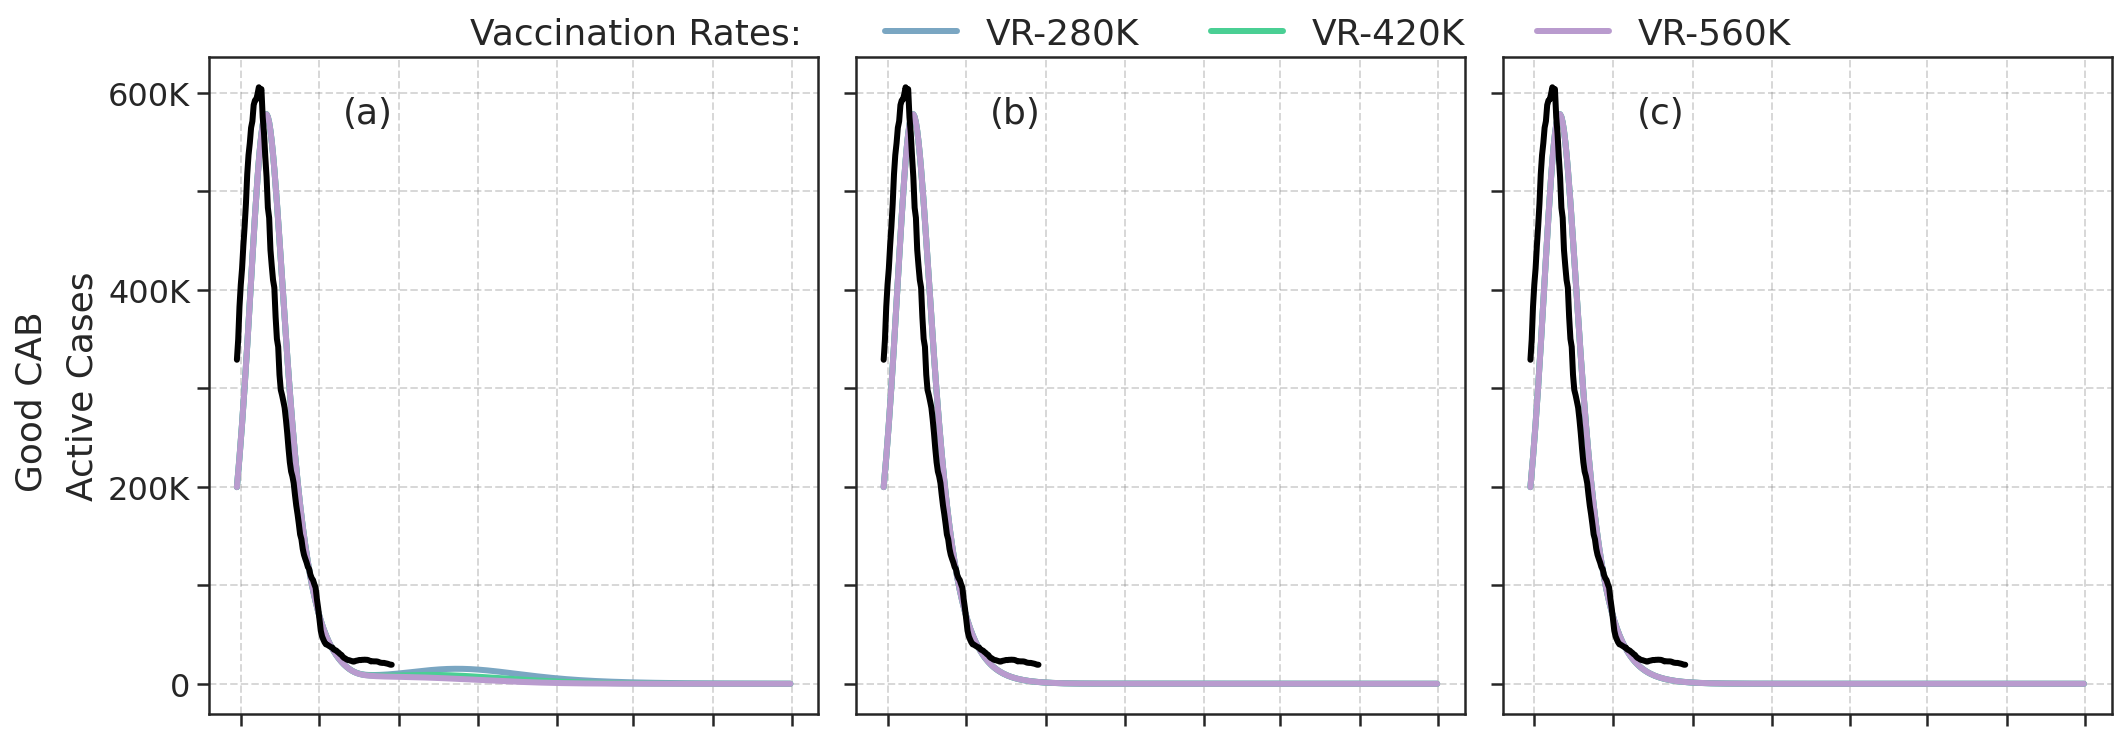

In [ ]:
Relplotter(df_active,"SD_RA","SD_Good",False,True,True,True,"Good CAB", 0)


<Figure size 252x576 with 0 Axes>

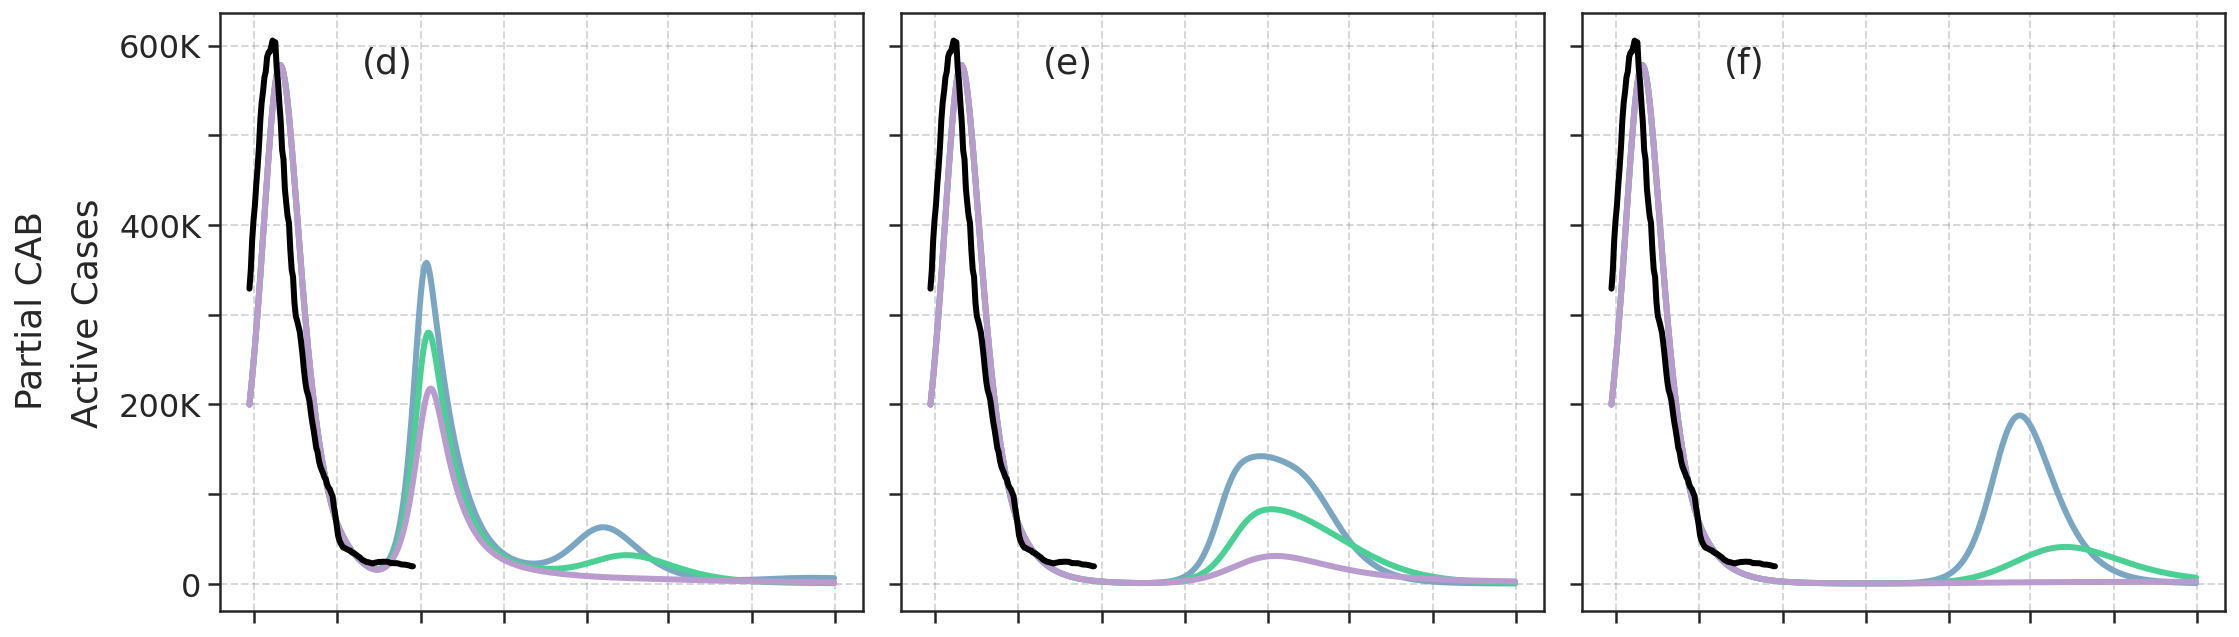

In [ ]:
Relplotter(df_active,"SD_RAR","SD_Bad",False,False,True,True,"Partial CAB", 3)


<Figure size 252x576 with 0 Axes>

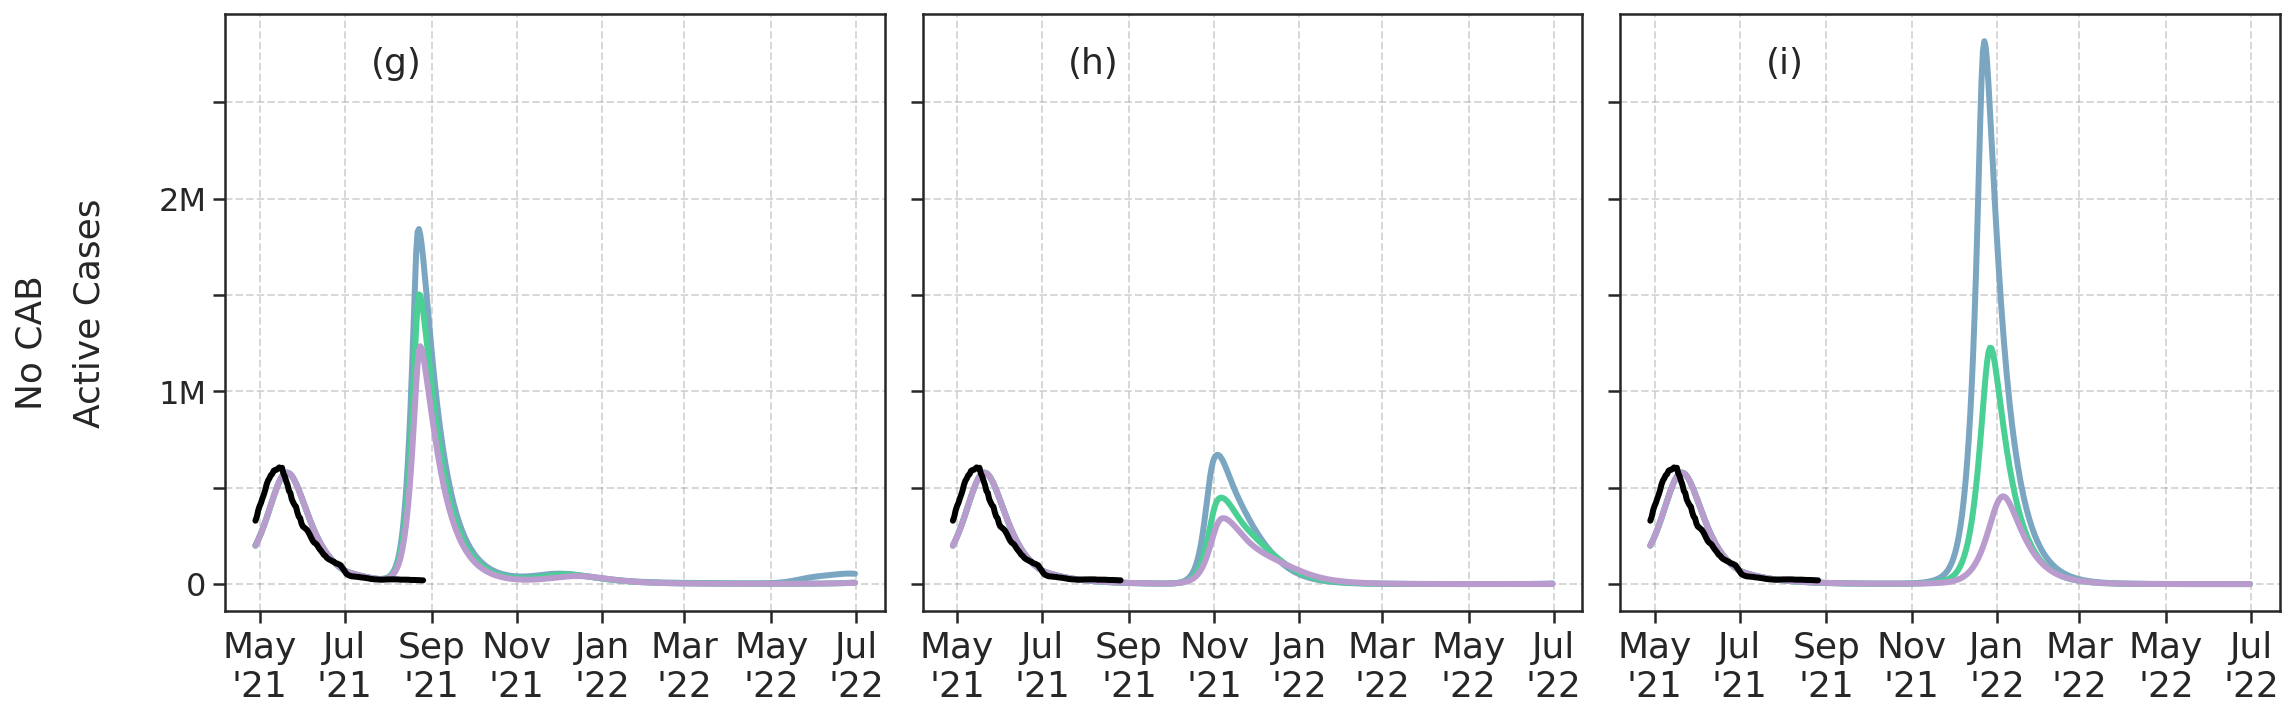

In [ ]:
Relplotter(df_active,"SD_RARF","SD_Worse",False,False,False,False,"No CAB", 6)

#4 Discussion and Summary



We have undertaken a comprehensive study by quantifying several uncertain causal factors to provide modelling evidence on the emergence of a new COVID wave in Karnataka, India. A total of 972 ensemble members were formed by varying seven key causal factors in our model (discussed in the Methods section). This first-principles-based model incorporates the nonlinear dynamics between all the causal factors and the confirmed, active, recovered, and deceased caseload of COVID-19 in Karnataka, India. 

First, our results indicate that the possibility of a new wave is most sensitive to a combination of factors, including the emergence of immune-escape and infectious newer variant, compliance of COVID Appropriate behaviour, and vaccination rate. It is possible to prevent the adverse consequences of a potential third wave by addressing all these factors. Our results indicate that it is critical to regulate the CAB and improve the vaccination rate among these three factors. Compliance with CAB can be regulated by enforcing and educating regarding appropriate NPIs such as mobility restriction, masking, and physical distancing mandates, and crowd control measures.

Our results indicate that emergence of new variants beyond September 2021 is not likely to induce new waves if the CAB is enforced like lockdown-like restrictions. While this is an extreme form of restriction, the results indicate that the state needs to be extremely cautious while rolling back restrictions.  We recognize that it is practically impossible to have CABs enforced similar to lockdown.

Even if a third wave is imminent due to the inability to implement CABs strictly, our results show that increasing the vaccination rate will reduce the peak active caseload. This reduction in active caseload is significant given that it will lead to reduced load on hospitals as fewer severe cases require hospitalization, ICU, and Oxygen. Among the scenarios, a vaccination rate of 480k per day (2x the average vaccination rate as of July 4, 2021) should have a lower probability of Wave-3 than other scenarios. The state can prepare the vaccination logistics based on this rate. Apart from arranging the vaccine doses, the state has to strengthen the micro plan and ensure better social mobilization to enhance the vaccination speed and coverage. 

Our results indicate that the daily confirmed cases of children (Age 0-11 and 12-17 years) at peak could be on average seven times more than the corresponding daily confirmed cases at Wave-2 peak. Based on the predicted increase in daily confirmed caseload of children in a potential Wave-3 compared to data of Wave-2, the policymakers can plan pediatric facilities for children with COVID positive status. Further, it is crucial to set up a registry of tested positive children to monitor for short- and long-term consequences, including Multisystem Inflammatory Syndrome in Children (MIS-C). Evidence from a study in the USA $^{[29]}$suggests that MIS-C  incidence is 5.1 (95\% CI, 4.5-5.8) persons per 1 million person-months. As such, we can expect 129 cases of MIS-C in one month during the peak. However, they also report that 316 MIS-C infections per 1 million COVID infections in children can occur. Thus, based on our results, we expect an estimated 514 children in Karnataka to suffer from MIS-C if a Wave-3 occurs. The best policy intervention would be to strengthen the healthcare services for children, including opening new pediatric ICUs. We recommend such an approach even if the reality is less severe than estimated (due to differences in India and the USA), as the facility can strengthen the country's pediatric healthcare.

Overall, policies to promote CAB to ensure at least partial compliance from the population is required. Next, increasing the vaccination rate to vaccinate the entire population by mid-Dec entirely is necessary to counter new variants and antibody waning, if any. Though the estimated Wave-3 numbers are for the state of Karnataka, the dynamics of the ensemble forecast will apply to all other states of India. Therefore, our recommendations can be contextualized for the policy interventions in the rest of the country.

One of the ensemble forecast limitations is that we have not considered the possibility of new variants infecting the vaccinated population. However, we have considered a fixed efficacy of 70\% for the vaccinated population that can partially offset the limitation. Further, the recovery rate is fitted to the data from July 2020 to May 2021; however, it could be more due to the vaccination effect or less due to new variants.





#Acknowledgments
We thank the Karnataka Technical Advisory Committee members and Dr Vinod Paul of Niti Aayog, Govt. of India, for insightful questions and discussion. All reported COVID data is obtained from www.covid19india.org. We are thankful to the MHRD Grant No. STARS-1/388 (SPADE) for partial support. Thivin is supported by a Graduate Fellowship from the Ministry of Education, Govt. of India. Deepak acknowledges the Arcot Ramachandran Young Investigator award for partial support. Giridhara R Babu is a senior fellow with Welcome Trust DBT India alliance.  


#References
1.  Government of India. COVID-19 dashboard; 2021.September 18, 202113/15
2.Foy BH, Wahl B, Mehta K, Shet A, Menon GI, Britto C.  Comparing COVID-19vaccine allocation strategies in India:  A mathematical modelling study.International Journal of Infectious Diseases. 2021;103:431–438.doi:https://doi.org/10.1016/j.ijid.2020.12.075.
3.  Samarasekera U.  India grapples with second wave of COVID-19.  The LancetMicrobe. 2021;2(6):e238.
4.  Cherian S, Potdar V, Jadhav S, Yadav P, Gupta N, Das M, et al.  Convergentevolution of SARS-CoV-2 spike mutations, L452R, E484Q and P681R, in thesecond wave of COVID-19 in Maharashtra, India.  BioRxiv. 2021;.
5.  Budhiraja S, Indrayan A, Aggarwal M, Jha V, Jain D, Tarai B, et al.Differentials in the characteristics of COVID-19 cases in Wave-1 and Wave-2admitted to a network of hospitals in North India.  medRxiv. 2021;.
6.  Asrani P, Eapen MS, Hassan MI, Sohal SS.  Implications of the second wave ofCOVID-19 in India.  Lancet Respir Med. 2021;.
7.  Babu GR, Sundaresan R, Athreya S, Akhtar J, Pandey PK, Maroon PS, et al.The burden of active infection and anti-sars-cov-2 igg antibodies in the generalpopulation:  Results from a statewide sentinel-based population survey inKarnataka, India.  Int J Infect Dis. 2021;108:27–36.
8.  Agrawal M, Kanitkar M, Vidyasagar M.https://pib.gov.in/PressReleasePage.aspx?PRID=1715485.  Press InformationBureau. 2021;.
9.Viboud C, Sun K, Gaffey R, Ajello M, Fumanelli L, Merler S, et al.  The RAPIDEbola forecasting challenge:  Synthesis and lessons learnt.  Epidemics.2018;22:13–21.
10.Johansson MA, Apfeldorf KM, Dobson S, Devita J, Buczak AL, Baugher B, et al.An open challenge to advance probabilistic forecasting for dengue epidemics.Proc Natl Acad Sci India. 2019;116(48):24268–24274.
11.  Reich NG, Brooks LC, Fox SJ, Kandula S, McGowan CJ, Moore E, et al.  Acollaborative multiyear, multimodel assessment of seasonal influenza forecastingin the United States.  Proceedings of the National Academy of Sciences.2019;116(8):3146–3154.
12.  Leutbecher M, Palmer TN.  Ensemble Forecasting.  J Comput Phys.2008;227(7):3515–3539.  doi:10.1016/j.jcp.2007.02.014.
13.  Ray EL, Wattanachit N, Niemi J, Kanji AH, House K, Cramer EY, et al.Ensemble forecasts of coronavirus disease 2019 (COVID-19) in the US.  MedRXiv.2020;.
14.  Farcomeni A, Maruotti A, Divino F, Jona-Lasinio G, Lovison G.  An ensembleapproach to short-term forecast of COVID-19 intensive care occupancy in Italianregions.  Biom J. 2021;63(3):503–513.
15.  Ranjan R, Sharma A, Verma MK.  Characterization of the Second Wave ofCOVID-19 in India.  medRxiv. 2021;.
16.  Chen J, Wang R, Wang M, Wei GW.  Mutations strengthened SARS-CoV-2infectivity.  J Mol Biol. 2020;432(19):5212–5226.September 18, 202114/15
17.  Adiga A, Athreya S, Lewis B, Marathe MV, Rathod N, Sundaresan R, et al.Strategies to Mitigate COVID-19 Resurgence Assuming Immunity Waning:  AStudy for Karnataka, India.  medRxiv. 2021;doi:10.1101/2021.05.26.21257836.
18.  Salvatore M, Basu D, Ray D, Kleinsasser M, Purkayastha S, Bhattacharyya R,et al.  Comprehensive public health evaluation of lockdown as anon-pharmaceutical intervention on COVID-19 spread in India:  national trendsmasking state-level variations.  BMJ Open. 2020;10(12):e041778.
19.  Ray D, Salvatore M, Bhattacharyya R, Wang L, Du J, Mohammed S, et al.Predictions, role of interventions and effects of a historic national lockdown inIndia’s response to the COVID-19 pandemic:  data science call to arms.  Harvarddata sci rev. 2020;2020(Suppl 1).
20.  Mandal S, Arinaminpathy N, Bhargava B, Panda S.  Plausibility of a third waveof COVID-19 in :  A mathematical modelling based analysis.  Ind J Med Res DOI.2021;10.
21.  Ganesan S, Subramani D.  Spatio-temporal predictive modeling framework forinfectious disease spread.  Sci Rep. 2021; p. 6741.  doi:10.1038/s41598-021-86084-7.
22.  Ganesan S, John V, Matthies G, Meesala R, Abdus S, Wilbrandt U.  An objectoriented parallel finite element scheme for computations of PDEs:  Design andimplementation.  2016 IEEE 23rd International Conference on High PerformanceComputing Workshops (HiPCW). 2016; p. 2–11.  doi:10.1109/HiPCW.2016.023.
23.Wilbrandt U, Bartsch C, Ahmed N, Alia N, Anker F, Blank L, et al.  ParMooN –a modernized program package based on mapped finite elements.  Comput Math.2016;74:74–88.  doi:10.1016/j.camwa.2016.12.020.
24.  Murhekar MV, Bhatnagar T, Selvaraju S, Saravanakumar V, Thangaraj JWV,Shah N, et al.  SARS-CoV-2 antibody seroprevalence in India, August–September,2020:  findings from the second nationwide household serosurvey.  Lancet GlobHealth. 2021;9(3):e257–e266.
25.Murhekar MV, Bhatnagar T, Selvaraju S, Rade K, Saravanakumar V, ThangarajJWV, et al.  Prevalence of SARS-CoV-2 infection in India:  Findings from thenational serosurvey, May-June 2020.  Indian J Med Res. 2020;152(1):48.
26.Lau EH, Tsang OT, Hui DS, Kwan MY, Chan Wh, Chiu SS, et al.  Neutralizingantibody titres in SARS-CoV-2 infections.  Nat Commun. 2021;12(1):1–7.
27.  Muecksch F, Wise H, Batchelor B, Squires M, Semple E, Richardson C, et al.Longitudinal Serological Analysis and Neutralizing Antibody Levels inCoronavirus Disease 2019 Convalescent Patients.  J Infect Dis.2020;223(3):389–398.  doi:10.1093/infdis/jiaa659.
28.  Cherian S, Potdar V, Jadhav S, Yadav P, Gupta N, Das M, et al.  SARS-CoV-2Spike Mutations, L452R, T478K, E484Q and P681R, in the Second Wave ofCOVID-19 in Maharashtra, India.  Microorganisms. 2021;9(7):1542.
29.  Incidence of Multisystem Inflammatory Syndrome in Children Among USPersons Infected With SARS-CoV-2, author=Payne, Amanda B and Gilani,Zunera and Godfred-Cato, Shana and Belay, Ermias D and Feldstein, Leora Rand Patel, Manish M and Randolph, Adrienne G and Newhams, Margaret andThomas, Deepam and Magleby, Reed and others.  JAMA Netw Open.2021;4(6):e2116420–e2116420.